# 221128

## 2-4. 그레디언트 기반 최적화

### (5) 도함수 연결 : 역전파 알고리즘
복잡한 식의 그레디언트는 어떻게 계산할 수 있을까<br>
2개의 층을 가진 모델의 가중치에 대한 손실 그레디언트는 어떻게 구할 수 있을까

#### * 연쇄법칙
"역전파" 는 '덧셈, 렐루, 텐서 곱셈 등과 같은' 기초적이고 간단한 연산의 도함수를 조합해서<br>
복잡한 연산의 그레디언트를 쉽게 계산하는 방법이다

#### *** loss_value = loss(y_true, softmax( dot( relu(dot(inputs, W1) + b1) , W2 ) + b2 )) ***
미적분의 '연쇄법칙' 을 사용하면 연결된 함수의 도함수를 구할 수 있다

## 7-2. 케라스 모델을 만드는 여러 방법
① Sequential 모델<br>
가장 시작하기 쉬운 API 모델이며, 기본적으로 하나의 파이선 '리스트' 형태이다<br>
단순히 층을 쌓기만 할 수 있다<br>

② 함수형 API<br>
그래프 같은 모델 구조를 주로 다루며, 사용성과 유연성 사이의 적절한 중간지점에 해당된다<br>
가장 널리 사용되는 모델 구축 API 이다<br>

③ Model 서브클래싱<br>
모든 것을 밑바닥부터 직접 만들 수 있으며, 모든 상세한 내용을 완전히 제어하고 싶은 경우에 적합하다<br>
하지만 여러가지 케라스 내장 기능을 사용할 수는 없다

### (1) Sequential 모델

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import keras
from keras import Sequential
from keras import layers
from keras import optimizers
from keras.layers import Input, Dense

In [3]:
### Sequential 클래스

model = keras.Sequential([
    layers.Dense(units=64, activation='relu'),
    layers.Dense(units=10, activation='softmax')
])

In [ ]:
### 점진적으로 Sequential 모델 만들기
model = keras.Sequential()
model.add(layers.Dense(units=64, activation='relu'))
model.add(layers.Dense(units=10, activation='softmax'))

층의 가중치 크기는 input 데이터의 크기에 따라 달라진다<br>
즉, input 데이터의 크기를 알기 전까지는 가중치를 만들 수 없다<br>
가중치를 생성하려면 어떤 데이터로 호출하거나, input 데이터의 크기를 지정하여 build() 메서드를 호출해야 한다

In [4]:
### 가중치 확인
model.weights    #build() 메서드 호출 전에는 가중치가 없다

ValueError: Weights for model sequential have not yet been created. Weights are created when the Model is first called on inputs or `build()` is called with an `input_shape`.

In [5]:
### 가중치를 만들기 위해 모델 호출
model.build(input_shape=(None, 3))    #model 의 build 메서드 호출
# (None : 어떤 배치 크기도 가능하다, 입력 크기 : 3)

## model 의 가중치 확인
model.weights

[<tf.Variable 'dense/kernel:0' shape=(3, 64) dtype=float32, numpy=
 array([[ 2.03200042e-01, -2.34490186e-01,  1.60224497e-01,
          2.19092965e-01, -2.98828363e-01,  3.76871228e-03,
          1.14926159e-01, -1.04870945e-01,  1.09038562e-01,
          1.52031869e-01, -1.85464218e-01,  2.15283215e-01,
          2.85792470e-01,  2.81848788e-01, -1.03033319e-01,
          2.63916552e-01,  3.76212895e-02, -2.39927277e-01,
         -1.70544118e-01,  2.85795212e-01, -1.50544569e-01,
          9.90921557e-02, -2.89343297e-01,  6.40109181e-03,
          1.53475881e-01,  1.84519082e-01,  1.87932551e-01,
         -1.77583396e-01, -1.84721708e-01, -1.56392276e-01,
         -7.59382099e-02, -2.59662122e-01, -2.89069027e-01,
         -8.90582800e-02, -1.47008091e-01,  1.25179052e-01,
          2.92165220e-01, -1.85315609e-01, -2.97288835e-01,
         -2.43261918e-01,  4.49869037e-02, -7.82375187e-02,
          2.61293650e-01, -1.03547662e-01, -2.63401568e-01,
         -2.31446028e-02, -8.0201

In [6]:
### summary() 메서드 : 모델 구조 출력
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                256       
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [7]:
### name 매개변수로 모델과 층에 이름 지정

#model = keras.Sequential(name = 'mpy_example_model')    #모델을 이름과 함께 새로 정의

model.add(layers.Dense(units=64, activation='relu', name = 'my_first_layer'))
model.add(layers.Dense(units=10, activation='softmax', name = 'my_last_layer'))

#model.build((None, 3))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                256       
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
 my_first_layer (Dense)      (None, 64)                704       
                                                                 
 my_last_layer (Dense)       (None, 10)                650       
                                                                 
Total params: 2,260
Trainable params: 2,260
Non-trainable params: 0
_________________________________________________________________


모델의 build() 메서드를 호출하기 전에는 summary() 메서드를 먼저 호출할 수 없다<br>

Sequential 모델의 가중치를 바로 생성하는 방법은<br>
모델의 입력 크기를 미리 지정하는 것이다 --> Input 클래스

In [8]:
### 모델의 입력 데이터 크기를 미리 지정 : Input 클래스

model = keras.Sequential(name = 'mpy_example_model')

model.add(Input(shape=(3,)))    #shape 매개변수의 값은 배치 크기가 아니라 각 샘플의 크기여야 한다

#model.add(layers.Dense(units=64, activation='relu', Input(shape=(3,), name = 'my_first_layer'))
model.add(layers.Dense(units=64, activation='relu', name = 'my_first_layer'))
model.add(layers.Dense(units=10, activation='softmax', name = 'my_last_layer'))

#model.build((None, 3))

model.summary()

Model: "mpy_example_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_first_layer (Dense)      (None, 64)                256       
                                                                 
 my_last_layer (Dense)       (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


### (2) 함수형 API
Sequential 모델은 사용하기는 쉽지만 하나의 입력과 하나의 출력을 가지며<br>
순서대로 층을 쌓은 모델만 표현할 수 있다<br>

하지만 실제로는 다중 입력, 다중 출력, 또는 비선형적 구조를 가진 모델을 자주 볼 수 있다<br>
이러한 경우 함수형 API 를 사용한 모델을 만든다<br>

layer 도 함수다<br>

#### * 간단한 예제

In [ ]:
### 2개의 Dense 층을 가진 함수형 모델

inputs = Input(shape=(3,))
features = Dense(units=64, activation='relu')(inputs)
outputs = Dense(units=10, activation='softmax')(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [9]:
## 1. Input 클래스 객체 정의
inputs = Input(shape=(3,))    #input 객체는 모델이 처리할 데이터의 크기와 dtype 에 대한 정보를 갖고 있다

In [10]:
print(inputs.shape)
print(inputs.dtype)

(None, 3)
<dtype: 'float32'>


In [11]:
## 2. 층 생성, 입력(inputs)으로 호출
features = Dense(units=64, activation='relu')(inputs)

In [12]:
features.shape

TensorShape([None, 64])

In [13]:
## 3. 모델 객체 생성
# 입력과 출력을 Model 클래스에 전달
outputs = Dense(units=10, activation='softmax')(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [14]:
## 4. 모델의 summary() 메서드 호출
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense_2 (Dense)             (None, 64)                256       
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [7]:
### 시각화
!pip install pydot

  Using cached pydot-1.4.2-py2.py3-none-any.whl (21 kB)


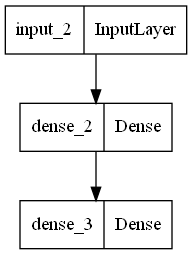

In [15]:
from keras.utils import plot_model
plot_model(model)

#### * 다중 입력, 다중 출력

<고객 이슈 티켓에 우선순위를 지정하고, 적절한 부서로 전달하는 시스템><br>
#입력 데이터 :<br>
-이슈 티켓의 제목 (텍스트 입력)<br>
-이슈 티켓의 텍스트 본문 (텍스트 입력)<br>
-사용자가 추가한 태그 (범주형 입력)<br>

#출력 데이터 :<br>
-이슈 티켓의 우선순위 점수 (0과 1 사이의 스칼라)<br>
-이슈 티켓을 처리해야할 부서

In [16]:
### 다중 입력, 다중 출력 함수형 모델 생성

vocabulary_size = 10000
num_tags = 100
num_departments = 4

## 1. 모델의 입력 정의 (입력 3개)
# Sequantial 은 input 을 1번만 쓸 수 있지만, 함수형 API 는 여러개의 입력이 가능하다
# 입력 데이터의 shape 가 모두 1차원
title = keras.Input(shape=(vocabulary_size,), name="title")
text_body = keras.Input(shape=(vocabulary_size,), name="text_body")
tags = keras.Input(shape=(num_tags,), name="tags")

## 2. 입력 특성을 하나의 텐서 features 로 연결 (리스트로 묶음)
features = layers.Concatenate()([title, text_body, tags])
features = layers.Dense(units=64, activation="relu")(features)    # 중간층 적용

## 3. 모델의 출력 정의 (출력 2개)
# 같은 features 를 입력으로 '2번' 넣을수있다
priority = layers.Dense(units=1, activation="sigmoid", name="priority")(features)
department = layers.Dense(units=num_departments,
                          activation="softmax", name="department")(features)

## 4. 입력과 출력을 지정하여 모델 생성
model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department])

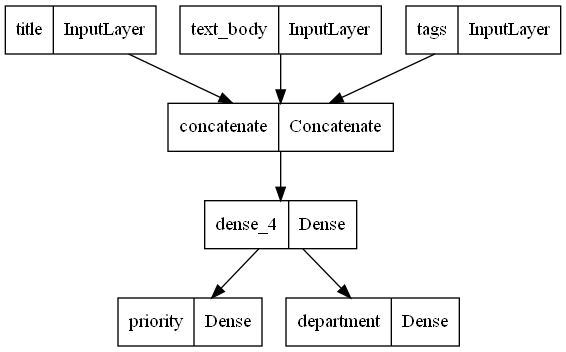

In [17]:
plot_model(model)

In [18]:
### 입력과 타깃 배열 리스트를 전달하여 모델 훈련

num_samples = 1280
#vocabulary_size = 10000
#num_tags = 100
#num_departments = 4

## 1. 입력 데이터
title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

## 2. 타깃 데이터
priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))

model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])            # loss 와 metrics 가 2개 --> output 이 2개 이므로

model.fit([title_data, text_body_data, tags_data],
          [priority_data, department_data],
          epochs=1)

model.evaluate([title_data, text_body_data, tags_data],
               [priority_data, department_data])

priority_preds, department_preds = model.predict([title_data, text_body_data, tags_data]) 

40/40 [==============================] - 0s 5ms/step


In [ ]:
### 입력과 타깃 배열을 딕셔너리로 전달하여 모델 훈련하기
# 입력과 출력이 많은 경우 Input 객체와 출력 층에 부여한 이름을 활용해서 데이터를 '딕셔너리' 로 전달할 수 있다

model.compile(optimizer="rmsprop",
              loss={"priority" : "mean_squared_error",
                    "department" : "categorical_crossentropy"},
              metrics={"priority" : ["mean_absolute_error"],
                       "department" : ["accuracy"]})

model.fit({"title" : title_data, "text_body" : text_body_data,
           "tags_data" : tags_data},
          {"priority" : priority_data, "department" : department_data},
          epochs=1)

model.evaluate({"title" : title_data, "text_body" : text_body_data,
           "tags_data" : tags_data},
          {"priority" : priority_data, "department" : department_data})

priority_preds, department_preds = model.predict(
    {"title" : title_data, "text_body" : text_body_data,
     "tags_data" : tags_data}) 

#### * 함수형 API 의 장점 : 층 연결 구조 활용하기
다중입력 & 다중출력 가능 , 중간과정도 삽입 (출력) 가능<br>

함수형 모델은 명시적인 그래프 데이터 구조이다. 층이 어떻게 연결되어있는지 조사하고, <br>
'이전' 그래프 노드(node, 층의 출력)를 새 모델의 일부로 '재사용' 할 수 있다<br>

'모델 시각화' 와 '특성 추출' 이라는 2가지 중요한 기능이 가능하다

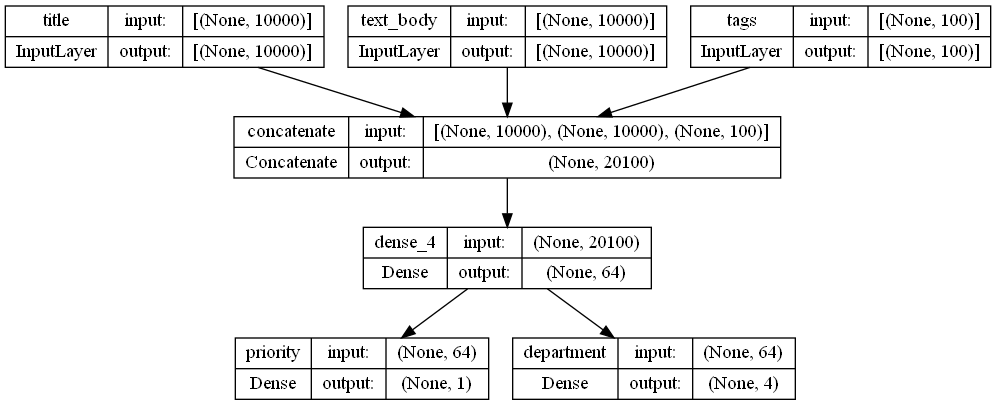

In [19]:
### 시각화
plot_model(model, show_shapes=True)

텐서 크기에서 'None' 은 '배치 크기' 를 나타낸다 --> 어떤 크기의 배치에서도 사용 가능하다는 것<br>
층 연결 구조를 참조하여 그래프에 있는 개별 노드를 조사하고, 재사용(층 호출) 할 수도 있다

In [20]:
#각각의 층을 좀더 자세히 확인
model.layers

In [21]:
model.layers[1]

In [22]:
model.layers[1].input

<KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'text_body')>

In [23]:
model.layers[1].output

<KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'text_body')>

In [29]:
model.layers[4].output

<KerasTensor: shape=(None, 64) dtype=float32 (created by layer 'dense_4')>

In [27]:
### 중간층의 출력을 재사용해서 새로운 모델 만들기
features = model.layers[4].output    #layer[4] : 중간층

difficulty = layers.Dense(units=3, activation='softmax', name='difficulty')(features)

new_model = keras.Model(inputs = [title, text_body, tags],
                       outputs = [priority, department, difficulty])

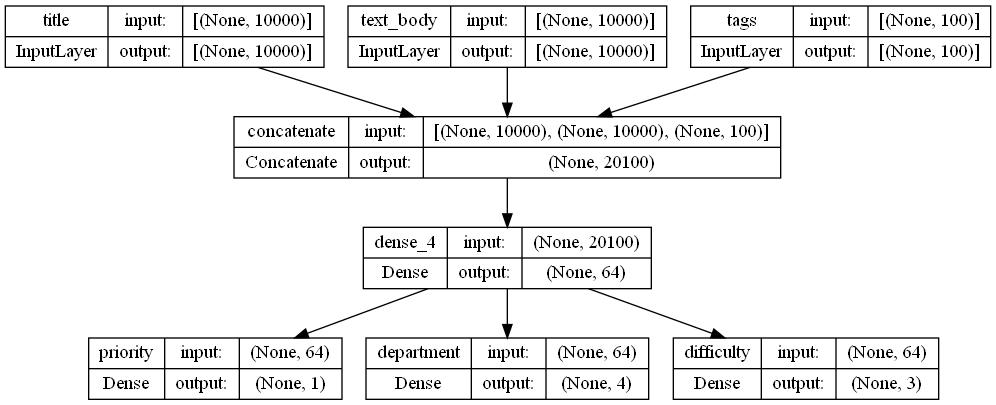

In [28]:
### 시각화
plot_model(new_model, show_shapes=True)

# 221129

## 2-4. 그레디언트 기반 최적화

### (5) 도함수 연결 : 역전파 알고리즘
"딥러닝"<br>
주어진 모델로 데이터 학습, 예측,<br>
실제값과 예측값을 비교하여 손실 정도 파악,<br>
각 파라미터 (가중치 & 편향) 값을 업데이트 하여 손실이 최소가 되도록 함<br>

그렇다면 파라미터 값은 어떤 기준으로 업데이트 해야할까<br>
--> 손실이 최소가 되는 방향으로<br>
--> 최소가 되는 방향을 어떻게 알 수 있을까<br>
--> "미분(편미분)" 을 이용하여 각 파라미터의 변화량에 따른 손실 변화량을 파악한다<br>
--> 여기에 "역전파 알고리즘" 이 이용된다<br>

"역전파" 는 최종 손실값(loss_val) 에서 시작하여 거꾸로 거슬러 올라가<br>
'각 파라미터가 손실값에 기여한 정도' 를 계산한다

## 2-5. 첫 번째 예제 다시 살펴보기

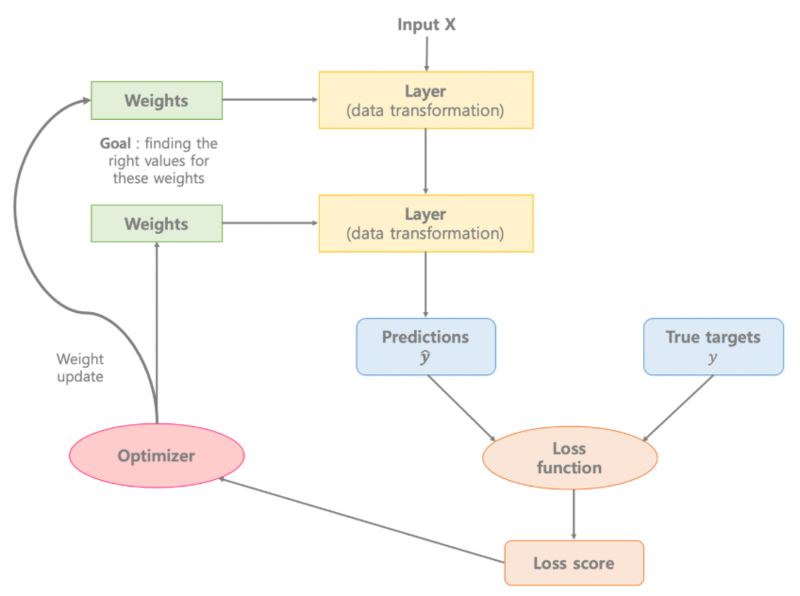

#### * 지금까지 배웠던 코드 정리 (MNIST)

In [ ]:
### 1. 입력 데이터
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255   #딥러닝은 항상 데이터 타입이 'float32'

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255


### 2. 모델 정의
model = keras.Sequential([
    layers.Dense(units=512, activation='relu'),   #hidden layer
    layers.Dense(units=10, activation='softmax')  #output layer
])


### 3. 모델 컴파일
model.compile(optimizer='rmsprop',    #optimizer : 경사하강법을 적용하는 구제척인 방식 결정
             loss='sparse_categorical_crossentropy',
             metrics='accuracy')


### 4. 훈련 반복
# 각 배치에서 모델이 가중치에 대한 손실의 그레디언트 계산,
# 후 손실을 감소시키는 방향으로 가중치 업데이트
# 이 경우 '한 에포크'에 가중치가 업데이트 되는 횟수는 496(= 60000 / 128), 총 횟수는 496 * 5
model.fit(train_images, train_labels, epochs=5, batch_size=128)

### (1) 텐서플로를 사용하여 다시 구현하기

#### * 단순한 Dense 클래스
output = activation(dot(W, inputs) + b)<br>

W 와 b 는 모델의 파라미터이고, activation 은 각 원소에 적용되는 함수이다<br>
(일반적으로는 'relu' 이지만, 마지막 층에는 'softmax' 를 사용한다)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import keras
from keras import Sequential
from keras import layers
from keras import optimizers
from keras.layers import Input, Dense

In [3]:
import tensorflow as tf

In [21]:
class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        
        #초기화
        self.activation = activation
        
        #가중치와 편향을 텐서 객체로 만듬 --> tf.Variable()
        self.W = tf.Variable(tf.random.uniform(shape=(input_size, output_size),
                                              minval=0, maxval=0.1))    #0 과 0.1 사이의 랜덤한 값
        self.b = tf.Variable(tf.zeros(shape=(output_size,)))    #0으로 이루어짐
        
        
    def __call__(self, inputs):    #정방향 패스를 수행함  
        return self.activation(tf.matmul(inputs, self.W) + self.b)    # tf.matmul() : 내적 연산 (dot)
    
    @property     #일종의 예약어, annotation = decoration (추가설명을 해줌)
    def weights(self):   #층의 가중치를 추출하기 위한 메서드
        return [self.W, self.b]

https://blog.naver.com/codeitofficial/221684462326<br>

@ : annotation (어노테이션, 애너테이션), decorator<br>
데이터에 대해 부가적인 설명을 달아준다

@property :<br>
함수를 속성으로 사용할 수 있게 한다 (괄호를 붙이지 않고 사용할 수 있게 함)<br>
@property 를 붙인 메소드는 일반적으로 어떤 인스턴스 변수에 대한 getter 메소드임을 나타낸다<br>

decorator :<br>
데코레이터는 어떤 함수를 꾸며서 새 함수로 만들어주는 기능을 한다<br>
데코레이터에서 골뱅이 뒤에 있는 단어는 어떤 함수의 이름이며, 그 함수가 어떤 함수를 꾸며주는 함수이다

#### * 단순한 Sequential 클래스

In [9]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers    #self : object, 접근을 위해 쓴다
        
    
    def __call__(self, inputs):    #층을 순서대로 호출
        #self.x = inputs
        x = inputs        
        
        for layer in self.layers:
            x = layer(x)            
        return x
    
    @property    #층의 파라미터를 쉽게 구할 수 있도록 weights 속성 제공
    def weights(self):
        weights = []
        for layer in self.layers:
            weights += layer.weights
            
        return weights
    
    #def __len__(self):        
    #    return len(self.weights)

In [10]:
### 케라스와 유사한 모델 생성
model = NaiveSequential([
            NaiveDense(input_size=28*28, output_size=512, activation=tf.nn.relu),
            NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
        ])

In [11]:
# 예약어 assert : 뒤의 부분이 맞는지 아닌지 확인 (True or False)
# True 이면 pass, False 이면 error 출력
assert len(model.weights) == 4

assert len(model.weights) == 4 에서 '4' 인 이유<br>
--> 각 층마다 weight, bias (2개) 가 있어서 (층이 2개)

In [ ]:
# if 문으로 나타내면
if len(model.weights) == 4:
    pass
else:
    raise

In [12]:
len(model.weights) == 4

True

In [13]:
# 정의되어있는 special method 확인
dir(model.weights)

['__add__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

In [17]:
print(model.weights.__len__())    #원래 방법
print(len(model.weights))

4
4


@property 덕분에 len(model.weights) 코드로 간단하게 길이를 확인할 수 있는 것이다

## 8-1. 합성곱 신경망 (convnet)

#### MNIST 숫자 이미지 분류에 컨브넷 적용하기

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense, Input, Conv2D, MaxPooling2D, Flatten

In [4]:
### 이전에 했던 모델

## 데이터 불러오기
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype("float32") / 255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype("float32") / 255


## 모델 생성
model = keras.Sequential([
    layers.Dense(units=512, activation='relu'),   #hidden layer
    layers.Dense(units=10, activation='softmax')  #output layer
])

model.compile(optimizer='rmsprop',
             loss='sparse_categorical_crossentropy',
             metrics='accuracy')

model.fit(train_images, train_labels, epochs=5, batch_size=128)


## 평가하기
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('테스트 정확도:', test_acc)

Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 0.2567 - accuracy: 0.9255
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1035 - accuracy: 0.9694
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0678 - accuracy: 0.9795
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0488 - accuracy: 0.9856
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0661 - accuracy: 0.9796
테스트 정확도: 0.9796000123023987


#### 컨브넷 적용하기 ①
컨브넷은 (image_height, image_width, image_channels) 크기의 입력 텐서를 사용한다<br>
--> (28, 28, 1)

In [5]:
### 간단한 컨브넷 만들기

inputs = Input(shape = (28, 28, 1))   #흑백사진 이미지로 처리한다

x = Conv2D(filters=32, kernel_size=3, activation='relu')(inputs)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = Flatten()(x)    #() : 함수가 아니라 클래스 라는 의미, 3D 출력을 1D 텐서로 펼침

outputs = layers.Dense(units=10, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [6]:
## 컨브넷의 구조 출력
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856 

Conv2D 와 MaxPooling2D 층의 출력은 (height, width, channels) 크기의 랭크-3 텐서 이다<br>
높이와 너비 차원은 모델이 깊어질수록 작아지는 경향이 있으며, 채널의 수는 Conv2D 층에 전달된<br>
'filters' 에 의해 조절된다 (32, 64, 128, ..)<br>

Flattern() 클래스는 1D 벡터를 처리하는 'Dense 층(밀집 연결 분류기)' 에 최종 출력 값을 주입하기 위해<br>
3D 출력을 1D 텐서로 펼치는 것을 수행한다

In [7]:
### MNIST 이미지에서 컨브넷 훈련하기
## 컨브넷은 (image_height, image_width, image_channels) 크기의 입력 텐서를 사용한다 --> (28, 28, 1)

#from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255

model.compile(optimizer='rmsprop',
             loss='sparse_categorical_crossentropy',
             metrics='accuracy')

model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 24s 25ms/step - loss: 0.1573 - accuracy: 0.9506
Epoch 2/5
938/938 [==============================] - 24s 25ms/step - loss: 0.0449 - accuracy: 0.9862
Epoch 3/5
938/938 [==============================] - 24s 25ms/step - loss: 0.0318 - accuracy: 0.9905
Epoch 4/5
938/938 [==============================] - 24s 25ms/step - loss: 0.0242 - accuracy: 0.9924
Epoch 5/5
938/938 [==============================] - 24s 25ms/step - loss: 0.0182 - accuracy: 0.9945


In [8]:
### 컨브넷 평가하기
test_loss, test_acc = model.evaluate(test_images, test_labels)

print(f'테스트 정확도:, {test_acc:.3f}')

313/313 [==============================] - 2s 4ms/step - loss: 0.0251 - accuracy: 0.9923
테스트 정확도:, 0.992


#### 컨브넷 적용하기 ②

#### 합성곱의 핵심 파라미터
Conv2D( filter=output_depth , kernel=(window_height , window_width) )<br>

* filter : 입력 데이터의 어떤 특성을 인코딩하는 것,<br>
(하나의 필터가 '입력에 얼굴이 있는지' 를 인코딩할 수 있다)<br>
특성 맵의 출력 깊이, 컨브넷 층으로 계산할 필터의 개수<br>

* kernel : 입력 데이터로부터 뽑아낼 패턴의 크기 (보통 3x3 또는 5x5)

In [9]:
inputs = Input(shape = (28, 28, 1))

x = Conv2D(filters=32, kernel_size=3, activation='relu')(inputs)
x = MaxPooling2D(pool_size=2)(x)     #filter 와 kernel 은 거의 같은 단어라고 볼 수 있다
x = Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = Flatten()(x)

x = Dense(units=20, activation='relu')(x)
x = Dense(units=20, activation='relu')(x)
outputs = Dense(units=10, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='rmsprop',
             loss='sparse_categorical_crossentropy',
             metrics='accuracy')

history = model.fit(train_images, train_labels, epochs=2, batch_size=256)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'테스트 정확도:, {test_acc:.3f}')

Epoch 1/2
235/235 [==============================] - 21s 87ms/step - loss: 0.6456 - accuracy: 0.7879
Epoch 2/2
313/313 [==============================] - 2s 4ms/step - loss: 0.0608 - accuracy: 0.9811
테스트 정확도:, 0.981


이전에 했던 모델 : 이미지 --> '숫자 배열' 로 변경 --> 784개의 데이터 에서 1개 출력<br>
컨브넷 사용 모델 : 이미지 --> 이미지 숫자 --> '숫자 배열' 로 변경 --> 784개의 데이터 에서 1개 출력<br>

DNN : 숫자 --> 1<br>
CNN : 이미지 --> DNN

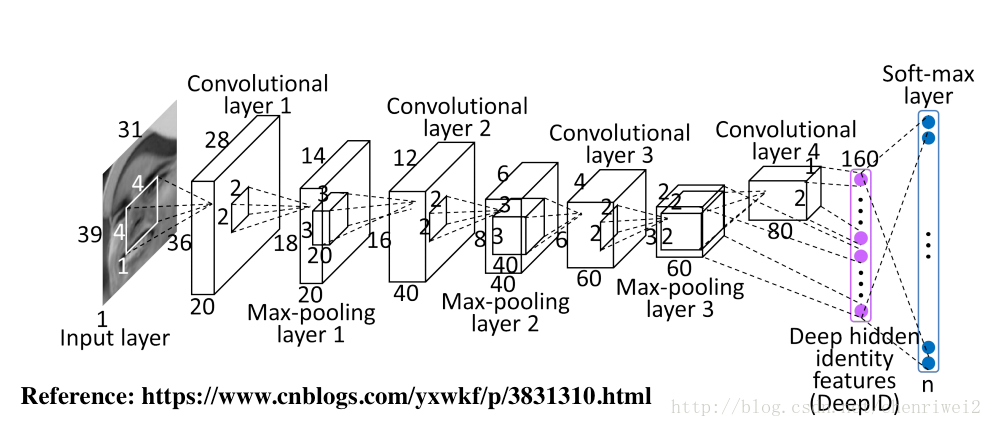

### (1) 합성곱 연산
https://ardino.tistory.com/39<br>
https://ardino.tistory.com/40<br>
https://ardino.tistory.com/41<br>

Dense 층 (완전 연결 층) 과 Convnet 층 (합성곱 층) 의 근본적인 차이는<br>
Dense 층은 입력 특성 공간에 있는 '전역 패턴 (MNIST 라면 모든 픽셀에 걸친 패턴)' 을 학습하지만,<br>
Convnet 층은 '지역 패턴' 을 학습한다. 이미지일 경우 작은 2D 윈도우로 입력에서 패턴을 찾는다

① 컨브넷이 이미지의 오른쪽 아래 모서리에서 어떤 패턴을 학습했다면,<br>
다른 곳(예: 왼쪽 위 모서리)에서도 이 패턴을 인식할 수 있다<br>
Dense 층(완전 연결 네트워크)은 새로운 위치에 나타난 것은 새로운 패턴으로 학습해야한다<br>

때문에 컨브넷이 Dense 층 보다 이미지를 효율적으로 처리할 수 있는 것이다<br>
적은 수의 훈련 샘플로도 일반화 능력을 가진 표현을 학습할 수 있다<br>
<br>

② 컨브넷은 패턴의 공간적 계층 구조를 학습할 수 있다<br>
첫번째 컨브넷 층이 '에지' 와 같은 작은 지역 패턴을 학습하면,<br>
두번째 층은 첫번째 층의 특성으로 구성된 '더 큰 패턴' 을 학습하는 것이다<br>

이러한 방식으로 컨브넷은 매우 복잡하고 추상적인 시각적 개념도<br>
효과적으로 학습할 수 있다

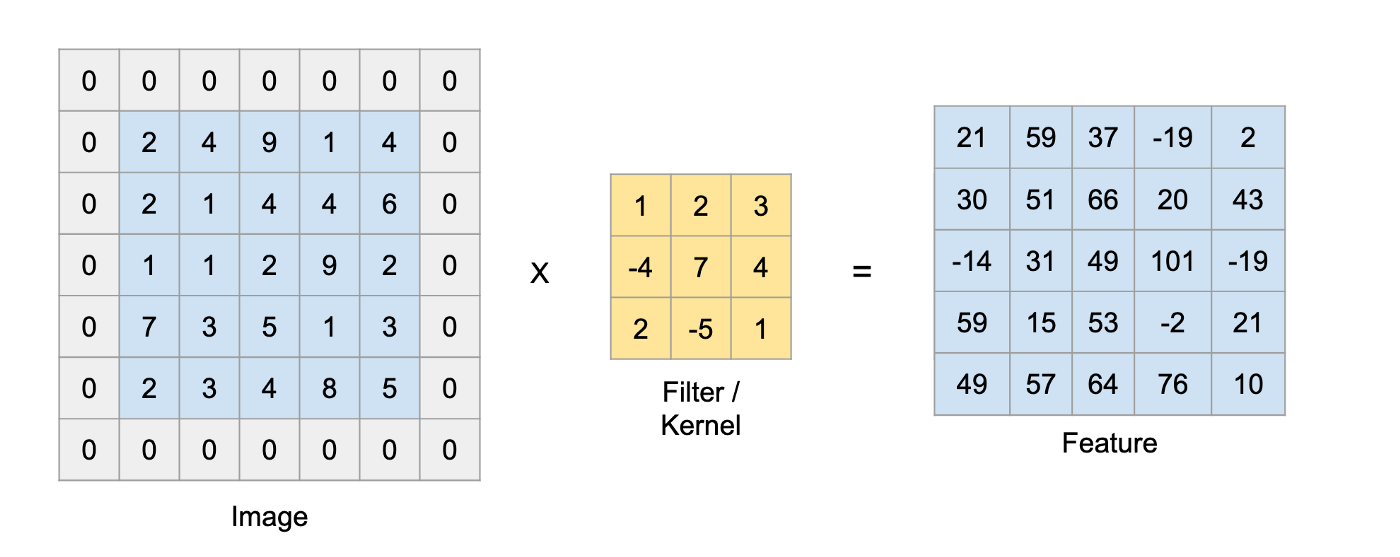

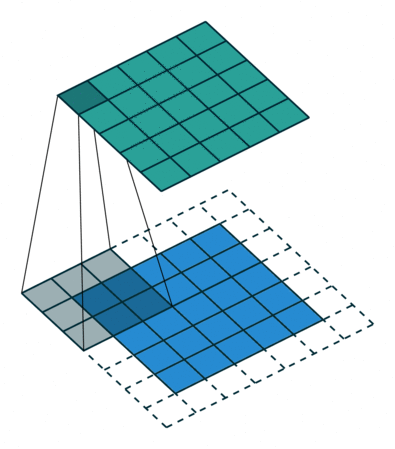

# 221130

## 2-4. 그레디언트 기반 최적화

### (5) 도함수 연결 : 역전파 알고리즘
"딥러닝"<br>
주어진 모델로 데이터 학습, 예측,<br>
실제값과 예측값을 비교하여 손실 정도 파악,<br>
각 파라미터 (가중치 & 편향) 값을 업데이트 하여 손실이 최소가 되도록 함<br>

그렇다면 파라미터 값은 어떤 기준으로 업데이트 해야할까<br>
--> 손실이 최소가 되는 방향으로<br>
--> 최소가 되는 방향을 어떻게 알 수 있을까<br>
--> "미분(편미분)" 을 이용하여 각 파라미터의 변화량에 따른 손실 변화량을 파악한다<br>
--> 여기에 "역전파 알고리즘" 이 이용된다<br>

"역전파" 는 최종 손실값(loss_val) 에서 시작하여 거꾸로 거슬러 올라가<br>
'각 파라미터가 손실값에 기여한 정도' 를 계산한다

#### * 텐서플로의 그레디언트 테이프
GradientTape 는 텐서플로의 '자동 미분 기능' 을 활용할 수 있는 API 이다<br>
파이썬의 with 문과 함께 사용하여 해당 코드 블록 안의 모든 텐서 연산을<br>
계산 그래프 형태 (=tape) 로 기록한다<br>

tf.Variable() : 변경가능한(mutable) 상태를 담기 위한 특별한 종류의 텐서<br>
신경망의 가중치는 항상 tf.Variable 의 인스턴스 이다

In [4]:
import tensorflow as tf

In [2]:
x = tf.Variable(0.)    # 초기값 0 으로 스칼라 변수 (숫자 그 자체) 생성
x

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>

In [3]:
tf.Variable([0.])

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>

In [4]:
tf.Variable([0., 1, 2.0])

<tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([0., 1., 2.], dtype=float32)>

In [5]:
with tf.GradientTape() as tape:    # GradientTape (클래스) 블록 시작
    y = 2*x + 3    # 변수에 텐서 연산 적용
grad = tape.gradient(y, x)    #tape 를 사용해서 변수 x에 대한 출력 y의 그레디언트 계산
grad

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

In [6]:
## GradientTape 를 다차원 텐서와 함께 사용
x = tf.Variable(tf.zeros((2,2)))    # 크기가 (2,2) 이고 초기값이 모두 0인 변수 생성
with tf.GradientTape() as tape:
    y = 2*x + 3
grad = tape.gradient(y, x)
grad

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 2.],
       [2., 2.]], dtype=float32)>

In [7]:
x = tf.Variable([0.])
with tf.GradientTape() as tape:
    y = 2*x + 3    
grad = tape.gradient(y, x)
grad

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([2.], dtype=float32)>

In [8]:
x = tf.Variable([1.])
with tf.GradientTape() as tape:
    y = 2*x**3 + 3    
grad = tape.gradient(y, x)
grad

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([6.], dtype=float32)>

In [9]:
## 변수 리스트의 그레디언트
W = tf.Variable(tf.random.uniform((2,2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2,2))

with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b     #tf.matmul() : 텐서플로의 점곱함수
grad = tape.gradient(y, [W, b])
grad

[<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[0.8707291 , 0.8707291 ],
        [0.51946425, 0.51946425]], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 2.], dtype=float32)>]

## 2-5. 첫 번째 예제 다시 살펴보기

### (1) 텐서플로를 사용하여 다시 구현하기

In [1]:
### 단순한 Dense 클래스
class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        
        #초기화
        self.activation = activation
        
        #가중치와 편향을 텐서 객체로 만듬 --> tf.Variable()
        self.W = tf.Variable(tf.random.uniform(shape=(input_size, output_size),
                                              minval=0, maxval=0.1))    #0 과 0.1 사이의 랜덤한 값
        self.b = tf.Variable(tf.zeros(shape=(output_size,)))    #0으로 이루어짐
        
        
    def __call__(self, inputs):    #정방향 패스를 수행함  
        return self.activation(tf.matmul(inputs, self.W) + self.b)    # tf.matmul() : 내적 연산 (dot)
    
    @property     #일종의 예약어, annotation = decoration (추가설명을 해줌)
    def weights(self):   #층의 가중치를 추출하기 위한 메서드
        return [self.W, self.b]

In [2]:
### 단순한 Sequential 클래스
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers    #self : object, 접근을 위해 쓴다
        
    
    def __call__(self, inputs):    #층을 순서대로 호출
        #self.x = inputs
        x = inputs        
        for layer in self.layers:
            x = layer(x)            
        return x
    
    @property    #층의 파라미터를 쉽게 구할 수 있도록 weights 속성 제공
    def weights(self):
        weights = []
        for layer in self.layers:
            weights += layer.weights
            
        return weights
    
    #def __len__(self):        
    #    return len(self.weights)

In [5]:
### 케라스와 유사한 모델 생성
model = NaiveSequential([
    NaiveDense(input_size=28*28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])

#### * ```__call__()``` 의 역할
https://wjunsea.tistory.com/61<br>

```__init__()``` :<br>
생성자 함수, 초기값 설정<br>
인스턴스 초기화를 위해 실행<br>

```__call__()``` :<br>
클래스의 객체를 호출할 수 있게 해주는 함수<br>
인스턴스가 호출되었을 때 실행된다

In [ ]:
def __call__():   # 자동 크기 추론
    def build()    # 가중치 생성
    def call()     # 정방향 패스 실행

In [13]:
class Test:
    def __call__(self, num):
        if num == 1:
            print("hello")
        else:
            raise    #강제로 에러를 발생시켜 반복을 멈춘다

In [14]:
test = Test()
test(1)

hello


In [15]:
test(2)

RuntimeError: No active exception to reraise

In [16]:
Test()(1)

hello


#### * 배치 제너레이터
미니 배치 순회 방법

In [6]:
import math

In [7]:
class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil( len(images) / batch_size )
        
    def next(self):    #batch_size 의 값만큼 슬라이싱
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

### (2) 훈련 스텝 실행하기
① 배치에 있는 이미지에 대해 모델의 예측 계산<br>
② 실제 레이블을 사용하여 예측의 손실값 계산<br>
③ 모델 가중치에 대한 손실 그레디언트 계산<br>
④ 그레디언트의 반대방향으로 가중치 업데이트<br>

In [8]:
### 가중치에 따른 손실의 그레디언트 계산 함수 정의
def one_training_step(model, images_batch, labels_batch):
    
    ## 정방향 패스 실행 : GradientTape 블록 안에서 모델의 예측 계산
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_batch_loss = tf.keras.losses.sparse_categorical_crossentropy(
        labels_batch, predictions)
        average_loss = tf.reduce_mean(per_batch_loss)
    
    ## 가중치에 대한 손실의 그레디언트 계산
    gradients = tape.gradient(average_loss, model.weights)
    
    ## 가중치 업데이트
    update_weights(gradients, model.weights)
    
    return average_loss

In [ ]:
### 가중치 업데이트 함수 정의
learning_rate = 0.001

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)    #assign_sub() : '-=' 와 동일

In [9]:
### 가중치 업데이트 함수 정의 : 케라스의 Optimizer 인스턴스 사용
from tensorflow.keras import optimizers
optimizer = optimizers.SGD(learning_rate=0.001)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))    # 역전파로 계산한다

### (3) 전체 훈련 루프
훈련 에포크 하나는 훈련 데이터의 각 배치에 대한 훈련 스텝을 반복하는 것이다<br>
전체 훈련 루프는 에포크의 반복이다

In [10]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"{epoch_counter}번째 에포크")
        batch_generator = BatchGenerator(images, labels)
        
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            
            ## 중간 체크
            if batch_counter % 100 == 0:
                print(f"{batch_counter}번째 배치 손실: {loss:.2f}")

In [11]:
### 함수 테스트
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype("float32") / 255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

0번째 에포크
0번째 배치 손실: 5.83
100번째 배치 손실: 2.23
200번째 배치 손실: 2.20
300번째 배치 손실: 2.09
400번째 배치 손실: 2.20
1번째 에포크
0번째 배치 손실: 1.88
100번째 배치 손실: 1.86
200번째 배치 손실: 1.82
300번째 배치 손실: 1.69
400번째 배치 손실: 1.80
2번째 에포크
0번째 배치 손실: 1.55
100번째 배치 손실: 1.56
200번째 배치 손실: 1.50
300번째 배치 손실: 1.41
400번째 배치 손실: 1.48
3번째 에포크
0번째 배치 손실: 1.30
100번째 배치 손실: 1.32
200번째 배치 손실: 1.24
300번째 배치 손실: 1.20
400번째 배치 손실: 1.26
4번째 에포크
0번째 배치 손실: 1.11
100번째 배치 손실: 1.15
200번째 배치 손실: 1.05
300번째 배치 손실: 1.04
400번째 배치 손실: 1.09
5번째 에포크
0번째 배치 손실: 0.97
100번째 배치 손실: 1.01
200번째 배치 손실: 0.91
300번째 배치 손실: 0.92
400번째 배치 손실: 0.98
6번째 에포크
0번째 배치 손실: 0.86
100번째 배치 손실: 0.90
200번째 배치 손실: 0.81
300번째 배치 손실: 0.83
400번째 배치 손실: 0.89
7번째 에포크
0번째 배치 손실: 0.78
100번째 배치 손실: 0.82
200번째 배치 손실: 0.73
300번째 배치 손실: 0.76
400번째 배치 손실: 0.83
8번째 에포크
0번째 배치 손실: 0.72
100번째 배치 손실: 0.75
200번째 배치 손실: 0.67
300번째 배치 손실: 0.70
400번째 배치 손실: 0.78
9번째 에포크
0번째 배치 손실: 0.67
100번째 배치 손실: 0.70
200번째 배치 손실: 0.62
300번째 배치 손실: 0.66
400번째 배치 손실: 0.74


fit 의 최종적 아웃풋은? W, b, grad??

### (4) 모델 평가하기
테스트 이미지에 대한 예측에 argmax 함수를 적용하고, 예상 레이블과 비교하여 모델을 평가한다

In [13]:
import numpy as np

In [14]:
predictions = model(test_images).numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"정확도: {matches.mean():.2f}")

정확도: 0.82


## 8-1. 합성곱 신경망 (convnet)
https://89douner.tistory.com/57

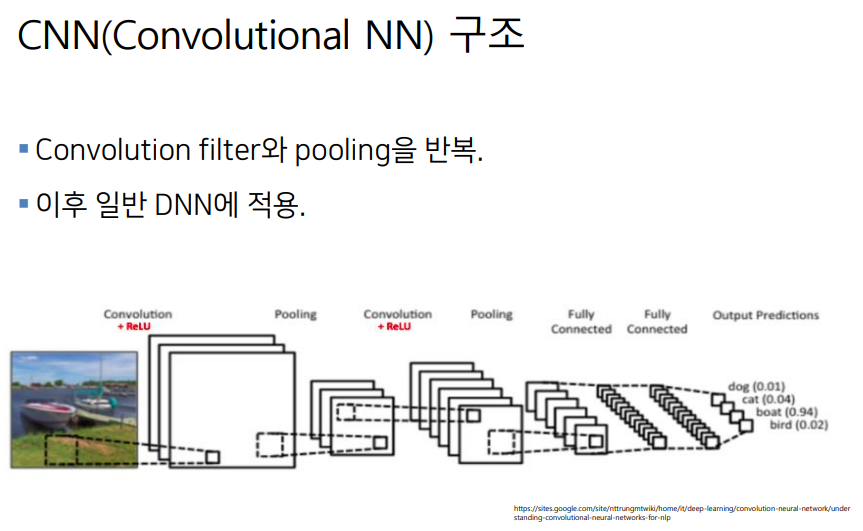

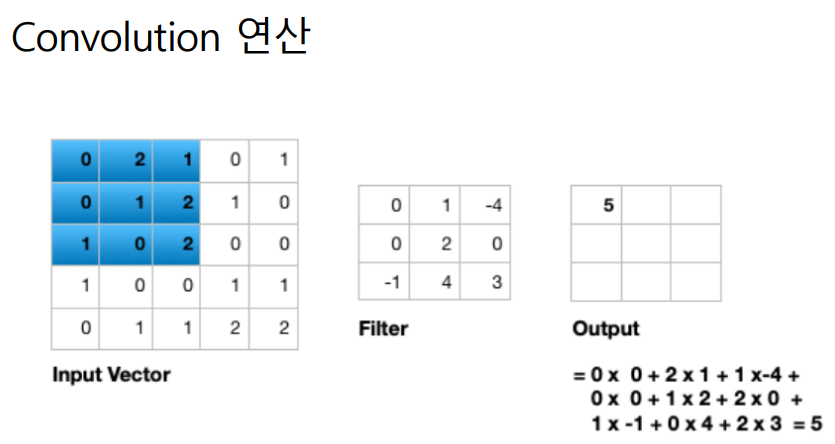

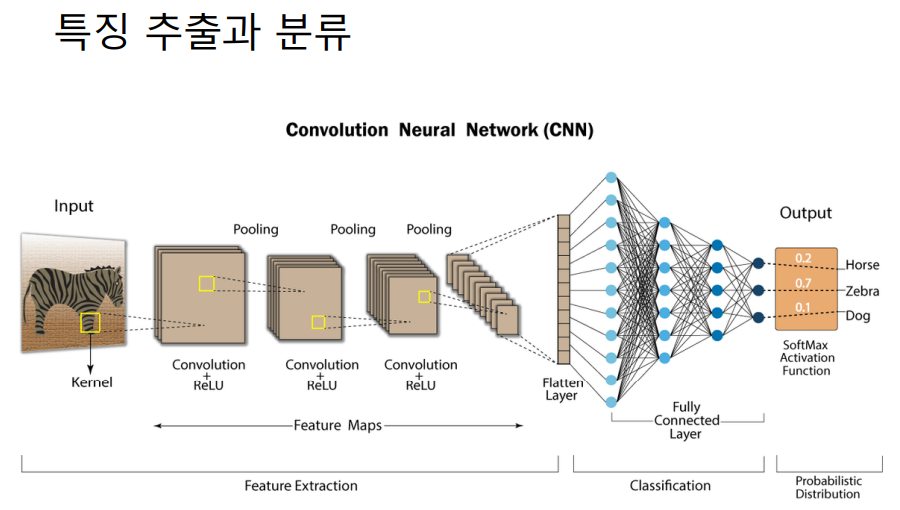

convolution 필터와 pooling이 반복되며 feature 추출, 이후 일반 DNN로 분류

컬러 이미지<br>
https://miro.medium.com/proxy/0*9J3MK1gd2zrFDzDN.gif<br>
https://poloclub.github.io/cnn-explainer/

# 221201

### 텐서플로와 케라스
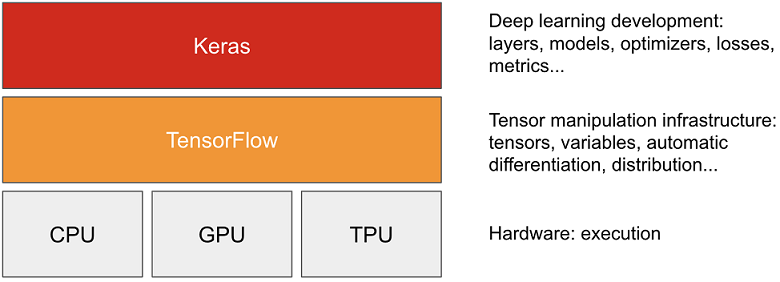

케라스 : 딥러닝 개발 --> 층, 모델, 옵테마이저, 손실, 측정 지표(metrics) 등<br>
텐서플로 : 텐서 조작 인프라 --> 텐서, 변수, 자동 미분, 분산 등<br>
CPU, GPU, TPU : 하드웨어 --> 실행

* 텐서플로(Tensorflow)<br>
구글에서 만든 파이썬 기반의 무료 오픈 소스 머신 러닝 플랫폼<br>
넘파이(numpy) 와 비슷하지만, 넘파이의 기능을 넘어선다<br>

* 케라스(Keras)<br>
텐서플로 위에 구축된 파이썬용 딥러닝 API<br>
어떤 종류의 딥러닝 모델도 쉽게 만들고, 훈련할 수 있는 방법을 제공<br>
텐서플로를 통해 케라스는 다양한 하드웨어 (GPU, TPU, CPU) 위에서 실행하고<br>
수천 대의 머신으로 매끄럽게 확장할 수 있다

## 3-5. 텐서플로 시작하기

### 신경망 훈련
(1) 저수준 텐서 연산 (텐서플로 API)
- 텐서 (신경망의 상태를 저장하는 특별한 텐서(변수)도 포함) = array<br>
- 덧셈, relu, matmul 과 같은 텐서 연산<br>
- 역전파 (그레디언트 계산, GradientTape 객체를 통해 처리됨)<br>

(2) 고수준 딥러닝 개념 (케라스 API)
- 모델을 구성하는 '층'<br>
- 손실 함수<br>
- 옵티마이저 (학습의 진행방향 결정)<br>
- 측정 지표 (모델의 성능 평가, 예 : accuracy)<br>
- 훈련 루프 (미니 배치 확률적 경사 하강법)

### (1) 상수 텐서와 변수
텐서 플로에서 어떤 작업을 하려면 '텐서' 가 필요하다<br>
'텐서' 를 만들기 위해서는 '초기값' 이 필요하다

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
### 모두 1 또는 0 인 텐서
tf.ones((2,1))

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[1.],
       [1.]], dtype=float32)>

In [3]:
tf.zeros((2,1))

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[0.],
       [0.]], dtype=float32)>

In [4]:
### 랜덤 텐서

## 정규 분포 (평균 0, 표준편차 1)
tf.random.normal((3,1), mean=0, stddev=1.)

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[-0.7934079 ],
       [-0.34612867],
       [ 0.02282977]], dtype=float32)>

In [5]:
tf.random.normal((3,2), mean=5, stddev=1.)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[5.208917 , 5.8155966],
       [5.93328  , 5.456282 ],
       [7.1099563, 3.983529 ]], dtype=float32)>

In [6]:
## 균등분포
tf.random.uniform((3,2), minval=0., maxval=0.5)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[0.07904202, 0.36864686],
       [0.10703957, 0.03356314],
       [0.1722256 , 0.38943732]], dtype=float32)>

넘파이 배열과 텐서플로 텐서 사이의 가장 큰 차이점은<br>
텐서플로 텐서에는 '값을 할당할 수 없다' 는 것이다<br>

즉 텐서플로 텐서는 '상수' 이다

In [8]:
## 텐서플로에서는 한번 값이 부여되고 나면 수정할 수 없다
x = tf.ones((2,2))
x

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.]], dtype=float32)>

In [9]:
## 값을 할당해줄 수 없다 (업데이트 할 수 없다)
x[0,0] = 10

TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

* tf.Variable() 클래스<br>
텐서플로에서 수정 가능한 상태를 관리하기 위한 클래스<br>
'변수' 를 만들려면 랜덤 텐서와 같이 초기값을 제공해야 한다

In [12]:
## 수정가능하게 바꿈 : tf.Variable() 클래스
x = tf.ones((2,2))   #초기값
v = tf.Variable(x)
v

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[1., 1.],
       [1., 1.]], dtype=float32)>

In [13]:
v[0,0] = 10

TypeError: 'ResourceVariable' object does not support item assignment

In [14]:
## 텐서플로 변수에 값 할당하기 : assign()
v[0,0].assign(10)

<tf.Variable 'UnreadVariable' shape=(2, 2) dtype=float32, numpy=
array([[10.,  1.],
       [ 1.,  1.]], dtype=float32)>

In [15]:
## assign_add() 사용하기 ('+=' 과 동일)
v.assign_add(tf.ones((2,2)))

<tf.Variable 'UnreadVariable' shape=(2, 2) dtype=float32, numpy=
array([[11.,  2.],
       [ 2.,  2.]], dtype=float32)>

### (2) 텐서 연산
tf.square(x) : 제곱<br>
tf.sqrt(x) : 제곱근<br>
tf.matmul(a, b) : 두 텐서의 점곱

### (3) GradientTape API

In [16]:
input_var = tf.Variable(3.)
input_var

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.0>

In [17]:
#함수식 정의
with tf.GradientTape() as tape:
    result = tf.square(input_var)    # y = x**2

#미분 결과 값
tape.gradient(result, input_var)

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

* tape.watch()<br>
tape.gradient() 의 입력은 어떤 텐서도 가능하다<br>
하지만 텐서플로는 기본적으로 '훈련 가능한 변수만' 추적한다<br>
따라서 '상수 텐서' 의 경우 'tape.watch()' 를 호출하여 추척한다는 것을 수동으로 알려주어야 한다<br>

사용하는 이유 : 자원 낭비를 막기 위해 테이프는 감시할 대상을 알아야 하며,<br>
훈련 가능한 변수는 기본적으로 감시 대상이다

In [18]:
# 상수 텐서 입력
input_const = tf.constant(3.)
input_const 

<tf.Tensor: shape=(), dtype=float32, numpy=3.0>

In [19]:
with tf.GradientTape() as tape:
    tape.watch(input_const)    #'tape.watch()' 호출 : 추척한다는 것을 수동으로 알림
    result = tf.square(input_const)    # y = x**2

tape.gradient(result, input_const)

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

In [20]:
## 중첩 GradientTape

#물체의 속도와 가속도
time = tf.Variable(10.)

with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position = 4.9 * time**2
    speed = inner_tape.gradient(position, time)   # 4.9 * 2*time

acceleration = outer_tape.gradient(speed, time)   # 4.9 * 2*1

print('position:', position)
print('speed:', speed)
print('acceleration:', acceleration)

position: tf.Tensor(490.0, shape=(), dtype=float32)
speed: tf.Tensor(98.0, shape=(), dtype=float32)
acceleration: tf.Tensor(9.8, shape=(), dtype=float32)


### (4) 텐서플로 선형 분류기

In [25]:
### 2D 평면에 두 클래스의 랜덤한 포인트 생성하기
num_samples_per_class = 1000

sample_1 = np.random.multivariate_normal(
    mean=[0,3],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class)

sample_2 = np.random.multivariate_normal(
    mean=[3,0],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class)

inputs = np.vstack((sample_1, sample_2)).astype(np.float32)
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype='float32'),
                     np.ones((num_samples_per_class, 1), dtype='float32')))

In [26]:
inputs

array([[ 0.9098047 ,  3.6234663 ],
       [-1.0669111 ,  2.7594867 ],
       [ 1.6018027 ,  3.010631  ],
       ...,
       [ 4.119334  ,  0.8815889 ],
       [ 3.418881  , -0.77240914],
       [ 2.7314904 ,  1.039958  ]], dtype=float32)

In [29]:
targets[:,0]

array([0., 0., 0., ..., 1., 1., 1.], dtype=float32)

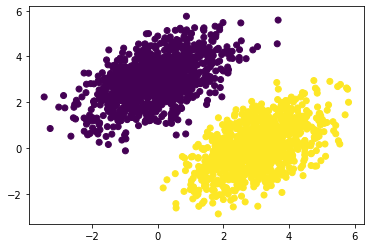

In [28]:
import matplotlib.pyplot as plt

plt.scatter(inputs[:,0], inputs[:,1], c=targets[:,0])
plt.show()

In [31]:
### 선형 분류기의 변수 만들기
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim, )))

In [32]:
### 정방향 패스 함수
def model(inputs):
    return tf.matmul(inputs, W) + b

### 평균 제곱 오차 손실 함수
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

### 훈련 스텝 함수
learning_rate = 0.1

def training_step(inputs, targets):
    ## 그레디언트 테이프 블록 안의 정방향 패스
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    
    ## 가중치에 대한 손실의 그레디언트
    grad_loss_W, grad_loss_b = tape.gradient(loss, [W, b])
    
    ## 가중치 업데이트
    W.assign_sub(grad_loss_W * learning_rate)
    b.assign_sub(grad_loss_b * learning_rate)
    
    return loss

In [34]:
### 배치 훈련 루프
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"{step}번째 스텝의 손실: {loss:.4f}")

0번째 스텝의 손실: 2.6968
1번째 스텝의 손실: 0.2798
2번째 스텝의 손실: 0.1362
3번째 스텝의 손실: 0.1111
4번째 스텝의 손실: 0.1014
5번째 스텝의 손실: 0.0943
6번째 스텝의 손실: 0.0880
7번째 스텝의 손실: 0.0823
8번째 스텝의 손실: 0.0772
9번째 스텝의 손실: 0.0724
10번째 스텝의 손실: 0.0681
11번째 스텝의 손실: 0.0642
12번째 스텝의 손실: 0.0606
13번째 스텝의 손실: 0.0574
14번째 스텝의 손실: 0.0544
15번째 스텝의 손실: 0.0517
16번째 스텝의 손실: 0.0492
17번째 스텝의 손실: 0.0470
18번째 스텝의 손실: 0.0450
19번째 스텝의 손실: 0.0431
20번째 스텝의 손실: 0.0414
21번째 스텝의 손실: 0.0398
22번째 스텝의 손실: 0.0384
23번째 스텝의 손실: 0.0372
24번째 스텝의 손실: 0.0360
25번째 스텝의 손실: 0.0349
26번째 스텝의 손실: 0.0339
27번째 스텝의 손실: 0.0331
28번째 스텝의 손실: 0.0323
29번째 스텝의 손실: 0.0315
30번째 스텝의 손실: 0.0308
31번째 스텝의 손실: 0.0302
32번째 스텝의 손실: 0.0297
33번째 스텝의 손실: 0.0292
34번째 스텝의 손실: 0.0287
35번째 스텝의 손실: 0.0283
36번째 스텝의 손실: 0.0279
37번째 스텝의 손실: 0.0276
38번째 스텝의 손실: 0.0272
39번째 스텝의 손실: 0.0269


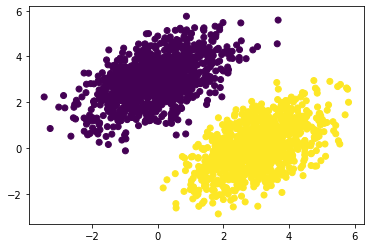

In [35]:
predictions = model(inputs)
plt.scatter(inputs[:,0], inputs[:,1], c=predictions[:,0] > 0.5)
plt.show()

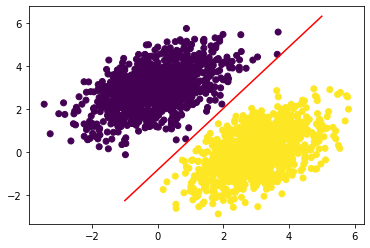

In [37]:
x = np.linspace(-1, 5, 100)
y = -W[0] / W[1] * x + (0.5-b) / W[1]

plt.plot(x, y, '-r')
plt.scatter(inputs[:,0], inputs[:,1], c=predictions[:,0] > 0.5)
plt.show()

## 3-6. 핵심 Keras API

### (1) Layer, 층 (딥러닝의 구성 요소)
'층(layer)' 은 하나 이상의 텐서를 입력으로 받고, 하나 이상의 텐서를 출력하는 데이터 처리 모듈이다<br>

'가중치(weight)' 라는 층의 상태를 가지며, 가중치는 확률적 경사 하강법 으로 학습되는<br>
하나 이상의 텐서이고 여기에 신경망이 학습한 지식이 담겨있다<br>

층마다 텐서 shape와 데이터 처리 방식이 다른데, 랭크-2 텐서 (samples, features) 에 저장된 벡터 데이터는<br>
'Dense 클래스 ( = 밀집 연결 층 / 완전 연결 층 / 밀집 층)' 으로 처리하는 경우가 많다<br>
랭크-3 텐서 (samples, timesteps, features) 에 저장된 시퀀스 데이터는 일반적으로 Conv1D (1D 합성곱 층)<br>
으로 처리한다<br>
랭크-4 텐서에 저장된 이미지 데이터는 Conv2D (2D 합성곱 층) 으로 처리한다<br>

케라스에서 딥러닝 모델을 만드는 것은 '호환되는 층' 을 서로 '연결' 하여 유용한 데이터 변환 파이프라인을 구성하는 것이다

#### * 케라스의 Layer 클래스
Layer 클래스의 상위 클래스 : model, sequential<br>

Layer 는 '가중치 (상태)' 와 '정방향 패스 (연산)' 이 들어있는 객체 이다<br>
가중치는 일반적으로 'build()' 메서드에서 정의하고,<br>
정방향 연산은 'call()' 메서드에서 정의한다

In [38]:
from tensorflow import keras

In [39]:
### Layer 의 서브클래스(subclass) 로 구현한 Dense 층

class SimpleDense(keras.layers.Layer):    #모든 케라스 층은 Layer 클래스를 상속한다
    def __init__(self, units, activation=None):
        super().__init__()    #부모 클래스에서 정의된 생성자 사용
        self.units = units
        self.activation = activation
    
    ## 가중치 생성 함수 build
    def build(self, input_shape):
        input_dim = input_shape[-1]   #열의 개수만
        
        self.W = self.add_weight(shape=(input_dim, self.units),   #2차원 array
                                initializer='random_normal')
        self.b = self.add_weight(shape=(self.units,),
                                initializer='zeros')
    
    ## 정방향 패스 계산 정의
    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

* add_weight()<br>
가중치를 간편하게 만들 수 있는 메서드<br>
독립적으로 변수를 생성하고, 층의 속성으로 할당할 수도 있다

In [40]:
dense = SimpleDense(units=32, activation=tf.nn.relu)   #relu = np.maximum(0, inputs)
input_tensor = tf.ones(shape=(2, 784))

In [41]:
## 층을 함수처럼 호출
# 부모 클래스(Layer) 에 정의된 __call()__ 때문
output_tensor = dense(input_tensor)
print(output_tensor.shape)

(2, 32)


In [27]:
tf.ones(shape=(100, 50))

<tf.Tensor: shape=(100, 50), dtype=float32, numpy=
array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], dtype=float32)>

In [42]:
dense = SimpleDense(units=64, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(100, 50))
output_tensor = dense(input_tensor)
print(output_tensor.shape)

(100, 64)


### (6) 검증 데이터

In [29]:
x = np.arange(1, 31)
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [45]:
# 훈련 세트와 검증 세트를 8:2 비율로 나눈다
np.random.shuffle(x)
train = x[:-int(len(x)*0.2)]
validation = x[-int(len(x)*0.2):]

In [46]:
train

array([22,  2,  6, 25, 12, 10,  7, 15,  5, 24, 26,  3,  9, 20,  1, 19,  4,
       28, 21, 18,  8, 11, 23, 13])

In [47]:
validation

array([14, 17, 30, 27, 16, 29])

In [ ]:
# 다른 방법
from sklearn.model_selection import train_test_split
train, validation = train_test_split(np.random.shuffle(x), test_size=0.2)

## 8-2. 소규모 데이터셋

### (3) 모델 만들기

In [51]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Input, Rescaling, Conv2D, MaxPooling2D, Dense, Flatten

In [52]:
### 강아지 vs 고양이 분류를 위한 소규모 컨브넷 만들기

inputs = keras.Input(shape=(180,180,3))   #180x180 크기의 RGB 이미지

x = layers.Rescaling(1./255)(inputs)   #입력을 255로 나누어 0~1 범위로 스케일 조정
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = layers.Flatten()(x)

outputs = layers.Dense(units=1, activation='sigmoid')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [53]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

In [54]:
### 모델 훈련 설정하기
model.compile(loss = 'binary_crossentropy',
             optimizer='rmsprop',
             metrics='accuracy')

### (4) 데이터 전처리

In [ ]:
### image_dataset_from_directory 를 사용하여 이미지 읽기
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / 'train',
    image_size=(180,180),
    batch_size=32)

validation_dataset = image_dataset_from_directory(
    new_base_dir / 'validation',
    image_size=(180,180),
    batch_size=32)

test_dataset = image_dataset_from_directory(
    new_base_dir / 'test',
    image_size=(180,180),
    batch_size=32)

In [ ]:
### Dataset 을 사용하여 모델 훈련하기

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='convnet')
]

history = model.fit(
    train_dataset,
    epochs=30,
    validation_data = validation_dataset,
    callbacks=callbacks)

# 221202

## 7-2. 케라스 모델을 만드는 여러 방법
① Sequential 모델<br>
가장 시작하기 쉬운 API 모델이며, 기본적으로 하나의 파이선 '리스트' 형태이다<br>
단순히 층을 쌓기만 할 수 있다<br>

② 함수형 API<br>
그래프 같은 모델 구조를 주로 다루며, 사용성과 유연성 사이의 적절한 중간지점에 해당된다<br>
가장 널리 사용되는 모델 구축 API 이다<br>

③ Model 서브클래싱<br>
모든 것을 밑바닥부터 직접 만들 수 있으며, 모든 상세한 내용을 완전히 제어하고 싶은 경우에 적합하다<br>
하지만 여러가지 케라스 내장 기능을 사용할 수는 없다

### (3) Model 서브클래싱
Model 클래스를 상속하는 것 또한 Layer 클래스를 상속하는 것과 비슷하다<br>

- ```__init__()``` 메서드 : 모델이 사용할 층 정의<br>
- call() 메서드 : 정방향 패스 정의<br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install tensorflow

In [6]:
import keras
from keras import Sequential
from keras import layers
from keras import optimizers
from keras.layers import Input, Dense

In [7]:
import tensorflow as tf

In [8]:
### 간단한 서브클래싱 모델 (고객 이슈 티켓 관리 모델)
class CustomerTicketModel(keras.Model):    #Model 클래스 상속
    
    def __init__(self, num_departments):   # 생성자 에서 층 정의
        super().__init__()    #부모 클래스의 생성자 호출
        
        self.concat_layer = layers.Concatenate()
        self.mixing_layer = layers.Dense(units=64, activation='relu')
        self.priority_scorer = layers.Dense(units=1, activation='sigmoid')
        self.department_classifier = layers.Dense(
            units=num_departments, activation='softmax')
        
    def call(self, inputs):   # call() 메서드에서 정방향 패스 정의
        title = inputs['title']
        text_body = inputs['text_body']
        tags = inputs['tags']
        
        features = self.concat_layer([title, text_body, tags])
        features = self.mixing_layer(features)
        
        priority = self.priority_scorer(features)
        department = self.department_classifier(features)
        
        return priority, department

모델을 정의하고 나면 이 클래스의 객체를 만들 수 있다<br>
Layer 클래스와 마찬가지로 어떤 데이터를 처음 호출할 때 '가중치' 를 만든다

In [9]:
num_samples = 1280
vocabulary_size = 10000
num_tags = 100
num_departments = 4

# 입력 데이터
title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

# 타깃 데이터
priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))

model = CustomerTicketModel(num_departments=4)
priority, department = model(
    {'title' : title_data, 'text_body' : text_body_data, 'tags' : tags_data})

In [10]:
model

In [11]:
priority

<tf.Tensor: shape=(1280, 1), dtype=float32, numpy=
array([[0.51361984],
       [0.6223586 ],
       [0.531573  ],
       ...,
       [0.6290478 ],
       [0.44016048],
       [0.4421629 ]], dtype=float32)>

In [12]:
department

<tf.Tensor: shape=(1280, 4), dtype=float32, numpy=
array([[0.23507574, 0.162204  , 0.25212812, 0.35059217],
       [0.1273259 , 0.10756082, 0.33096033, 0.43415296],
       [0.09255417, 0.08101156, 0.07411248, 0.75232184],
       ...,
       [0.11999707, 0.2106289 , 0.3767189 , 0.29265508],
       [0.20049   , 0.17904563, 0.13119534, 0.48926905],
       [0.24763498, 0.25702822, 0.20353563, 0.29180112]], dtype=float32)>

* Layer 클래스 상속과 Model 클래스 상속의 차이점<br>
'층(Layer)' 은 모델을 만드는 데 사용하는 '구성요소' 이고,<br>
'모델(Model)' 은 실제로 훈련하고 추론에 사용하는 '최상위 객체' 이다<br>
Model 클래스는 fit(), evaluate(), predict() 메서드를 가지고 있지만,<br>
Layer 클래스는 이러한 메서드가 없다

In [13]:
### Model 을 상속하여 만든 모델 컴파일 및 훈련하기

#model = CustomerTicketModel(num_departments=4)

#손실과 측정지표로 전달하는 값은 call() 메서드가 반환하는 값과 정확하게 일치해야한다
#(여기에서는 2개 - priority, department 의 원소를 가진 리스트)
model.compile(optimizer = 'rmsprop',
             loss = ['mean_squared_error', 'categorical_crossentropy'],
             metrics = ['mean_absolute_error', 'accuracy'])

#입력 및 타깃 데이터의 구조는 call() 메서드가 기대하는 것과 정확히 일치해야한다
#(여기에서는 입력 데이터는 딕셔너리, 타깃 데이터는 리스트)
model.fit({'title' : title_data,
           'text_body' : text_body_data,
           'tags' : tags_data},
         [priority_data, department_data],
         epochs=1)

model.evaluate({'title' : title_data,
           'text_body' : text_body_data,
           'tags' : tags_data},
         [priority_data, department_data])

priority_preds, department_preds = model.predict({'title' : title_data,
                                                  'text_body' : text_body_data,
                                                  'tags' : tags_data})

print('priority_preds:', priority_preds)
print('department_preds:', department_preds)

40/40 [==============================] - 0s 3ms/step
priority_preds: [[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]
department_preds: [[7.3986475e-09 3.4730890e-10 7.0390459e-03 9.9296099e-01]
 [1.1812447e-09 7.7937429e-10 9.8950742e-03 9.9010497e-01]
 [1.7992954e-09 1.2068844e-09 2.8710002e-03 9.9712902e-01]
 ...
 [9.0161221e-09 2.3978805e-10 1.3599121e-02 9.8640084e-01]
 [1.0167618e-09 4.6747206e-10 4.2413720e-03 9.9575859e-01]
 [7.5832611e-09 3.4225431e-10 5.1097376e-03 9.9489021e-01]]


### (4) 여러 방식을 혼합하여 사용하기
케라스 API 로 만든 모델은 Sequential 모델, 함수형 모델, 또는<br>
밑바닥부터 만든 서브클래싱 모델에 상관없이 서로 상호 운영할 수 있다

In [14]:
### 서브클래싱한 모델을 포함하는 함수형 모델 만들기

## 서브클래싱한 모델
class Classifier(keras.Model):
    def __init__(self, num_classes=2):
        super().__init__()
        if num_classes == 2:
            num_units = 1
            activation = 'sigmoid'
        else:
            num_units = num_classes
            activation = 'softmax'
        
        self.dense = layers.Dense(units = num_units, activation = activation)
        
    def call(self, inputs):
        return self.dense(inputs)
    
## 함수형 API 사용
inputs = keras.Input(shape=(3,))
features = layers.Dense(units=64, activation='relu')(inputs)
outputs = Classifier(num_classes=10)(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [15]:
### 함수형 모델을 포함하는 서브클래싱 모델 만들기

inputs = keras.Input(shape=(64,))
outputs = layers.Dense(units=1, activation='sigmoid')(inputs)
binary_classifier = keras.Model(inputs=inputs, outputs=outputs)

class MyModel(keras.Model):
    def __init__(self, num_classes=2):
        super().__init__()
        self.dense = layers.Dense(units = 64, activation = 'relu')
        self.classifier = binary_classifier
        
    def call(self, inputs):
        features = self.dense(inputs)
        return self.classifier(features)
    
model = MyModel()

## 7-3. 내장된 훈련 루프와 평가 루프

In [16]:
### 표준 워크 플로 : compile(), fit(), evaluate(), predict()
from tensorflow.keras.datasets import mnist

# 모델 생성
def get_mnist_model():
    inputs = keras.Input(shape=(28 * 28,))
    features = layers.Dense(512, activation="relu")(inputs)
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10, activation="softmax")(features)
    model = keras.Model(inputs, outputs)
    return model

# 데이터 로드
(images, labels), (test_images, test_labels) = mnist.load_data()
images = images.reshape((60000, 28 * 28)).astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]

model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.fit(train_images, train_labels,
          epochs=3,
          validation_data=(val_images, val_labels))

# evaluate() 메서드 : 새로운 데이터에 대한 손실과 측정지표 계산
test_metrics = model.evaluate(test_images, test_labels)

# predict() 메서드 : 새로운 데이터에 대한 분류 확률 계산
predictions = model.predict(test_images)

11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/3
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2964 - accuracy: 0.9128 - val_loss: 0.1467 - val_accuracy: 0.9577
Epoch 2/3
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1604 - accuracy: 0.9532 - val_loss: 0.1114 - val_accuracy: 0.9694
Epoch 3/3
313/313 [==============================] - 0s 765us/step


위와 같은 워크플로를 '커스터마이징' 할 수 있는 방법이 있다<br>
① 사용자 정의 측정 지표 전달<br>
② fit() 메서드에 '콜백(callback)' 전달 : 훈련하는 동안 특정 시점에 수행될 행동 예약

### (1) 사용자 정의 지표 만들기 (Metrics)
지표(metric) : 모델의 성능을 측정하는 열쇠<br>
훈련 데이터 성능과 테스트 데이터 성능 사이의 차이를 측정하는 것이 중요하다<br>

케라스 지표는 keras.metrics.Metric 클래스를 상속한 클래스 이다<br>
층과 마찬가지로 지표도 텐서플로 변수에 내부 상태를 저장하며,<br>
층과 다른 점은 이 변수가 역전파로 업데이트 되지 않는다는 것이다<br>
따라서 상태 업데이트 로직을 update_state() 메서드 안에 직접 작성해야 한다

In [17]:
### Metric 클래스를 상속하여 사용자 정의 지표 구현하기
import tensorflow as tf

class RootMeanSquaredError(keras.metrics.Metric):    # metric 클래스 상속
    
    # 생성자에서 상태 변수 정의, 층과 마찬가지로 add_weight() 메서드 사용
    def __init__(self, name='rmse', **kwargs):
        super().__init__(name=name, **kwargs)
        self.mse_sum = self.add_weight(name='mse_sum', initializer='zeros')
        self.total_samples = self.add_weight(
            name='total_samples', initializer='zeros', dtype='int32')
        
    # update_state() 메서드 : 상태 업데이트 로직 구현
    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.one_hot(y_true, depth=tf.shape(y_pred)[1])    # y_true : 배치의 타깃(또는 레이블) , y_pred : 모델의 예측값
        mse = tf.reduce_sum(tf.square(y_true - y_pred))           # y_pred 는 각 클래스에 대한 확률을 담고 있으므로 y_true를 이에 맞추어 원-핫 인코딩으로 변환
        self.mse_sum.assign_add(mse)
        num_samples = tf.shape(y_pred)[0]
        self.total_samples.assign_add(num_samples)
        
    # 현재 지표 값 반환
    def result(self):
        return tf.sqrt(self.mse_sum / tf.cast(self.total_samples, tf.float32))

    # 객체를 다시 생성하지 않고 상태 초기화
    def reset_state(self):
        self.mse_sum.assign(0.)
        self.total_samples.assign(0)

- add_weight()<br>
가중치를 간편하게 만들 수 있는 메서드<br>
독립적으로 변수를 생성하고, 층의 속성으로 할당할 수도 있다

In [18]:
### 사용자 정의 지표 테스트
model = get_mnist_model()

model.compile(optimizer='rmsprop',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy', RootMeanSquaredError()])

model.fit(train_images, train_labels,
         epochs=3,
          validation_data=(val_images, val_labels))

test_metrics = model.evaluate(test_images, test_labels)
test_metrics

Epoch 1/3
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2948 - accuracy: 0.9128 - rmse: 7.1786 - val_loss: 0.1525 - val_accuracy: 0.9565 - val_rmse: 7.3545
Epoch 2/3
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1596 - accuracy: 0.9537 - rmse: 7.3518 - val_loss: 0.1141 - val_accuracy: 0.9668 - val_rmse: 7.3998
Epoch 3/3
313/313 [==============================] - 0s 956us/step - loss: 0.0986 - accuracy: 0.9729 - rmse: 7.4316


[0.09856943786144257, 0.9728999733924866, 7.431609153747559]

### (2) 콜백 사용하기 (Callback)
콜백은 fit() 메서드 호출 시 모델에 전달되는 객체 (특정 메서드를 구현한 클래스 객체) 이다<br>
훈련하는 동안 모델은 여러 지점에서 콜백을 호출하며, 콜백은 모델의 상태와 성능에 대한<br>
모든 정보에 접근하고 '훈련 중지, 모델 저장, 가중치 적재 또는 모델 상태 변경 등' 을 처리할 수 있다

* 모델 체크포인트 (checkpoint) 저장<br>
훈련하는 동안 어떤 지점에서 모델의 '현재 가중치를 저장' 한다<br>

* 조기 종료 (early stopping)<br>
검증 손실이 '더이상 향상되지 않을 때' 훈련 중지<br>
(훈련하는 동안 얻은 가장 좋은 모델 저장)<br>

* 훈련하는 동안 하이퍼파라미터 값을 동적으로 조정<br>
예: optimizer 의 학습률<br>

* 훈련과 검증 지표를 로그에 기록하거나, 모델이 학습한 표현이 업데이트 될 때마다 시각화<br>
예: fit() 메서드의 진행 표시줄

* Keras.callbacks 모듈에 포함되어 있는 내장 콜백<br>
keras.callbacks.ModelCheckpoint<br>
keras.callbacks.EarlyStopping<br>
keras.callbacks.LearningRateScheduler<br>
keras.callbacks.ReduceLROnPlateau<br>
keras.callbacks.CSVLogger

#### * ModelCheckpoint 와 EarlyStopping 콜백
EarlyStopping 콜백 : 정해진 에포크 동안 모니터링 지표가 향상되지 않을 때 훈련을 중지한다<br>
예: 과대적합이 시작되자마자 훈련을 중지할 수 있다 --> 에포크 횟수를 줄여 다시 모델을 훈련할 필요가 없음<br>

일반적으로 EarlyStopping 콜백은 훈련하는 동안 모델을 계속 '저장' 해주는 ModelCheckpoint 콜백과 함께 사용한다<br>
(선택적으로 지금까지 가장 좋은 모델만 저장할 수 있다 = 에포크 끝에서 최고의 성능을 낸 모델)

In [19]:
from keras import layers

In [20]:
### fit() 메서드에서 callbacks 매개변수 사용하기

## fit() 메서드의 callbacks 매개변수 --> 콜백의 리스트를 모델로 전달
callbacks_list = [
    keras.callbacks.EarlyStopping(    #EarlyStopping : 성능향상이 멈추면 훈련 중지
        monitor='val_accuracy',       #모델의 검증 정확도 모니터링
        patience=2                    #2번의 에포크 동안 정확도가 향상되지 않으면 훈련 중지
    ),
    keras.callbacks.ModelCheckpoint(         #ModelCheckpoint : 매 에포크 끝에서 현재 가중치 저장
        filepath='checkpoint_path.keras',    #모델 파일의 저장경로
        monitor='val_loss',                  #val_loss 가 좋아지지 않으면 모델 파일을 덮어쓰지 않음
        save_best_only=True                  #(훈련하는 동안 가장 좋은 모델이 저장됨)
    )
]

model = get_mnist_model()

model.compile(optimizer='rmsprop',
             loss = 'sparse_categorical_crossentropy',
             metrics = 'accuracy')

model.fit(train_images, train_labels,
         epochs=10,
         callbacks=callbacks_list,
         validation_data=(val_images, val_labels))

Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2970 - accuracy: 0.9126 - val_loss: 0.1443 - val_accuracy: 0.9586
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1571 - accuracy: 0.9540 - val_loss: 0.1100 - val_accuracy: 0.9693
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1315 - accuracy: 0.9631 - val_loss: 0.1001 - val_accuracy: 0.9729
Epoch 4/10
1563/1563 [==============================] - 5s 4ms/step - loss: 0.1129 - accuracy: 0.9687 - val_loss: 0.1013 - val_accuracy: 0.9736
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1047 - accuracy: 0.9718 - val_loss: 0.0986 - val_accuracy: 0.9736
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0945 - accuracy: 0.9736 - val_loss: 0.0921 - val_accuracy: 0.9775
Epoch 7/10
1563/1563 [==============================] - 5s 4ms/step - loss: 0.0873 - accuracy: 0.9762 - val_loss: 0.0934 - val_accuracy:

In [21]:
## 저장된 모델 로드
model = keras.models.load_model('checkpoint_path.keras')
model

In [22]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 866us/step - loss: 0.0791 - accuracy: 0.9799


[0.07914029061794281, 0.9799000024795532]

In [23]:
model.predict(test_images[:10])

1/1 [==============================] - 0s 35ms/step


array([[9.33135134e-14, 2.20915510e-15, 3.86652993e-12, 1.33166381e-10,
        2.05562993e-20, 1.35090994e-13, 1.21140035e-21, 1.00000000e+00,
        5.07386606e-16, 8.92812300e-13],
       [8.16979904e-12, 2.01249521e-11, 1.00000000e+00, 1.62783742e-09,
        4.23771373e-21, 1.32104982e-12, 4.29712559e-12, 4.18776341e-23,
        2.54563402e-11, 7.28191418e-22],
       [1.10353948e-09, 9.99997497e-01, 1.10247605e-07, 4.30620206e-10,
        1.03203388e-06, 2.75688148e-08, 8.51670805e-08, 1.16958813e-06,
        1.06330297e-07, 1.14172727e-09],
       [9.99999881e-01, 1.50817761e-11, 1.04702806e-07, 3.20955595e-10,
        2.13417195e-09, 7.58959118e-10, 1.24673816e-09, 1.00837347e-08,
        2.97605738e-14, 3.92513311e-09],
       [1.34196450e-08, 3.30315671e-11, 1.17554189e-10, 4.39290938e-13,
        9.99989271e-01, 8.22927448e-10, 1.21109223e-09, 5.57059423e-07,
        7.48837364e-12, 1.00897605e-05],
       [1.66977421e-11, 9.99994874e-01, 1.20241916e-09, 4.47402254e-11,
   

In [24]:
#model.predict(test_images[10])
model.predict(test_images[9:10])

1/1 [==============================] - 0s 14ms/step


array([[2.8551011e-14, 7.5954546e-15, 1.7541197e-13, 7.9226885e-12,
        4.6595953e-05, 1.4554387e-11, 1.0838792e-17, 7.1418952e-05,
        1.9118207e-08, 9.9988198e-01]], dtype=float32)

### (3) 사용자 정의 콜백 만들기
on_epoch_begin(epoch, logs) : 각 에포크가 시작할 때 호출됨<br>
on_epoch_end(epoch, logs)   : 각 에포크가 끝날 때 호출됨<br>

on_batch_begin(batch, logs) : 각 배치 처리가 시작하기 전에 호출됨<br>
on_batch_end(batch, logs)   : 각 배치 처리가 끝난 후에 호출됨<br>

on_train_begin(logs) : 훈련이 시작될 때 호출됨<br>
on_train_end(logs)   : 훈련이 끝날 때 호출됨

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers, Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import Callback

import time

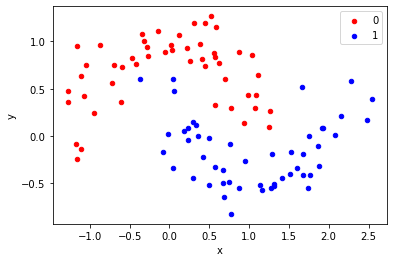

In [26]:
from sklearn.datasets import make_moons

# 데이터 생성
x, y = make_moons(n_samples=100, noise=0.2, random_state=32)

# 데이터 그림 그리기
df = pd.DataFrame(dict(x=x[:,0], y=x[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

# 데이터 나누기
split_index = int(len(x)*0.3)
train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:] 

In [27]:
# copy from https://gist.github.com/stared/dfb4dfaf6d9a8501cd1cc8b8cb806d2e

from IPython.display import clear_output
from tensorflow.keras.callbacks import Callback

class PlotLosses(Callback):

    def on_train_begin(self, logs={}):
        self.epochs = []
        self.losses = []
        self.val_losses = []
        self.logs = []
        self.fig = plt.figure()

    def on_epoch_end(self, epoch, logs={}):
        self.epochs.append(epoch)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))

        clear_output(wait=True)
        plt.plot(self.epochs, self.losses, label="loss")
        plt.plot(self.epochs, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();
        print("loss = ", self.losses[-1], ", val_loss = ", self.val_losses[-1]) 

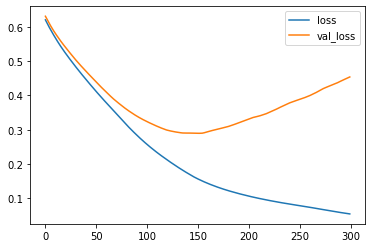

loss =  0.05415038764476776 , val_loss =  0.4540906250476837


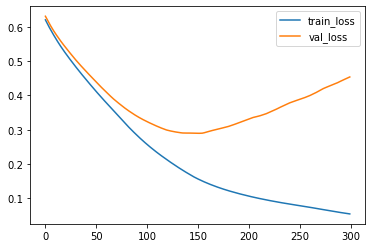

In [28]:
model = Sequential()
model.add(Input(2))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(2, activation="softmax"))
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy')

plot_losses = PlotLosses()

history = model.fit(train_x, train_y,
                    epochs=300, batch_size=128,
                    verbose=0, validation_split=0.2,
                    callbacks=[plot_losses])

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show() 

### (4) 텐서보드를 사용한 모니터링과 시각화
텐서보드(https://www.tensorflow.org/tensorboard) 는 로컬에서 실행할 수 있는 브라우저 기반 애플리케이션이다<br>
훈련하는 동안 모델 안에서 일어나는 모든 것을 모니터링하기 위한 좋은 방법이다<br>

* 훈련하는 동안 측정 지표를 시각적으로 모니터링 한다<br>
* 모델 구조를 시각화 한다<br>
* 활성화 출력과 그레디언트의 히스토그램을 그린다<br>
* 임베딩을 3D 로 표현한다

In [29]:
import os
os.getcwd()

'C:\\Users\\AB350'

In [30]:
model = get_mnist_model()

model.compile(optimizer='rmsprop',
             loss = 'sparse_categorical_crossentropy',
             metrics = 'accuracy')

# keras.callbacks.TensorBoard 콜백 : fit() 메서드와 함께 텐서보드를 사용하는 가장 쉬운 방법
tensorboard = keras.callbacks.TensorBoard(
    log_dir= "C:\\Users\\AB350",   # 로그를 저장할 위치 지정
)

model.fit(train_images, train_labels,
         epochs=3,
         validation_data=(val_images, val_labels),
         callbacks=[tensorboard])

Epoch 1/3
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2944 - accuracy: 0.9113 - val_loss: 0.1492 - val_accuracy: 0.9582
Epoch 2/3
1563/1563 [==============================] - 5s 4ms/step - loss: 0.1602 - accuracy: 0.9548 - val_loss: 0.1199 - val_accuracy: 0.9674
Epoch 3/3
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1298 - accuracy: 0.9639 - val_loss: 0.1016 - val_accuracy: 0.9744


In [31]:
# 텐서보드 인터페이스에서 훈련과 평가지표를 실시간 그래프로 모니터링
tensorboard --logdir "C:\\Users\\AB350"

SyntaxError: invalid syntax (3762891531.py, line 2)

In [32]:
%load_ext tensorboard
%tensorboard --logdir "C:\\Users\\AB350"

## 7-4. 사용자 정의 훈련, 평가 루프 만들기

### (1) 훈련 vs 추론

In [69]:
### 지도학습을 위한 훈련 스텝
def train_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs, training=True)   # 정방향 패스에서 케라스 모델을 호출할 때는 'training=True' 로 지정해야한다
        loss = loss_fn(targets, predictions)
    
    gradients = tape.gradients(loss, model.trainable_weights)   #모델 가중치 그레디언트 추출
    optimizer.apply_gradients( zip(model.trainable_weights, gradients) )

### (2) 측정 지표(metrics) 의 저수준 사용법

In [71]:
### 측정 지표 API : 타깃과 예측에 대해 update_state() 호출
metric = keras.metrics.SparseCategoricalAccuracy()
targets = [0,1,2]
predictions = [[1,0,0], [0,1,0], [0,0,1]]
metric.update_state(targets, predictions)
current_result = metric.result()
np.round(current_result, 2)

1.0

In [73]:
### 스칼라 값의 평균 추적 : keras.metrics.Mean
values = [0,1,2,3,4]
mean_tracker = keras.metrics.Mean()
for value in values:
    mean_tracker.update_state(value)
print(np.round(mean_tracker.result(), 2))

2.0


### (3) 완전한 훈련과 평가루프

In [79]:
### 단계별 훈련 루프 (1) : 훈련 스텝 함수
model = get_mnist_model()

loss_fn = keras.losses.SparseCategoricalCrossentropy()   #손실함수
optimizer = keras.optimizers.RMSprop()   #옵티마이저
metrics = [keras.metrics.SparseCategoricalAccuracy()]    #모니터링할 지표 리스트
loss_tracking_metric = keras.metrics.Mean()   #손실 평균을 추적할 평균 지표

def train_step(inputs, targets):
    ## 정방향 패스 실행 ('training=True')
    with tf.GradientTape() as tape:
        predictions = model(inputs, training=True)
        loss = loss_fn(targets, predictions)
    
    ## 역방향 패스 실행 ('model.trainable_weights' 사용)
    gradients = tape.gradient(loss, model.trainable_weights)   #모델 가중치 그레디언트 추출
    optimizer.apply_gradients( zip(gradients, model.trainable_weights) )
    
    ## 측정 지표 계산
    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs[metric.name] = metric.result()
        
    ## 손실 평균 계산
    loss_tracking_metric.update_state(loss)
    logs['loss'] = loss_tracking_metric.result()
    
    ## 지표와 손실의 현재 값 반환
    return logs

In [80]:
### 단계별 훈련 루프 (2) : 지표 재설정 (reset_state())
# 매 에포크 시작과 평가 전에 지표의 상태를 재설정 해야한다
def reset_metrics():
    for metric in metrics:
        metric.reset_state()
    loss_tracking_metric.reset_state()

In [81]:
### 단계별 훈련 루프 (3) : 훈련 루프 자체
## tf.data.Dataset 객체를 사용하여 넘파이 데이터를 크기가 32인 배치로 변경
training_dataset = tf.data.Dataset.from_tensor_slices(
    (train_images, train_labels))
training_dataset = training_dataset.batch(32)

epochs=3
for epoch in range(epochs):
    reset_metrics()
    for inputs_batch, targets_batch in training_dataset:
        logs = train_step(inputs_batch, targets_batch)
    print(f"{epoch}번째 에포크 결과")
    for key, value in logs.items():
        print(f"...{key} : {value:.4f}")

0번째 에포크 결과
...sparse_categorical_accuracy : 0.9136
...loss : 0.2924
1번째 에포크 결과
...sparse_categorical_accuracy : 0.9535
...loss : 0.1610
2번째 에포크 결과
...sparse_categorical_accuracy : 0.9636
...loss : 0.1315


In [83]:
### 단계별 평가 루프
def test_step(inputs, targets):
    predictions = model(inputs, training=False)
    loss = loss_fn(targets, predictions)
    
    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs["val_" + metric.name] = metric.result()
        
    ## 손실 평균 계산
    loss_tracking_metric.update_state(loss)
    logs['val_loss'] = loss_tracking_metric.result()
    
    ## 지표와 손실의 현재 값 반환
    return logs

val_dataset = tf.data.Dataset.from_tensor_slices( (val_images, val_labels) )
val_dataset = val_dataset.batch(32)
reset_metrics()

for inputs_batch, targets_batch in val_dataset:
    logs = test_step(inputs_batch, targets_batch)
    print("평가 결과:")
    for key, value in logs.items():
        print(f"...{key} : {value:.4f}")

평가 결과:
...val_sparse_categorical_accuracy : 1.0000
...val_loss : 0.0130
평가 결과:
...val_sparse_categorical_accuracy : 0.9844
...val_loss : 0.0420
평가 결과:
...val_sparse_categorical_accuracy : 0.9792
...val_loss : 0.1311
평가 결과:
...val_sparse_categorical_accuracy : 0.9844
...val_loss : 0.0996
평가 결과:
...val_sparse_categorical_accuracy : 0.9688
...val_loss : 0.1555
평가 결과:
...val_sparse_categorical_accuracy : 0.9635
...val_loss : 0.1629
평가 결과:
...val_sparse_categorical_accuracy : 0.9643
...val_loss : 0.1461
평가 결과:
...val_sparse_categorical_accuracy : 0.9648
...val_loss : 0.1338
평가 결과:
...val_sparse_categorical_accuracy : 0.9653
...val_loss : 0.1284
평가 결과:
...val_sparse_categorical_accuracy : 0.9688
...val_loss : 0.1158
평가 결과:
...val_sparse_categorical_accuracy : 0.9688
...val_loss : 0.1084
평가 결과:
...val_sparse_categorical_accuracy : 0.9714
...val_loss : 0.0996
평가 결과:
...val_sparse_categorical_accuracy : 0.9712
...val_loss : 0.0963
평가 결과:
...val_sparse_categorical_accuracy : 0.9688
...val_loss :

### (4) tf.function 으로 성능 높이기
@tf.function 데코레이터 : 전역적인 최적화 가능 (계산 그래프로 컴파일)<br>
평가 루프를 실행하는 데 걸리는 시간이 단축된다

In [84]:
### 평가 스텝 함수에 @tf.function 추가하기

@tf.function
def test_step(inputs, targets):
    predictions = model(inputs, training=False)
    loss = loss_fn(targets, predictions)
    
    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs["val_" + metric.name] = metric.result()
        
    ## 손실 평균 계산
    loss_tracking_metric.update_state(loss)
    logs['val_loss'] = loss_tracking_metric.result()
    
    ## 지표와 손실의 현재 값 반환
    return logs

val_dataset = tf.data.Dataset.from_tensor_slices( (val_images, val_labels) )
val_dataset = val_dataset.batch(32)
reset_metrics()

for inputs_batch, targets_batch in val_dataset:
    logs = test_step(inputs_batch, targets_batch)
    print("평가 결과:")
    for key, value in logs.items():
        print(f"...{key} : {value:.4f}")

평가 결과:
...val_sparse_categorical_accuracy : 1.0000
...val_loss : 0.0130
평가 결과:
...val_sparse_categorical_accuracy : 0.9844
...val_loss : 0.0420
평가 결과:
...val_sparse_categorical_accuracy : 0.9792
...val_loss : 0.1311
평가 결과:
...val_sparse_categorical_accuracy : 0.9844
...val_loss : 0.0996
평가 결과:
...val_sparse_categorical_accuracy : 0.9688
...val_loss : 0.1555
평가 결과:
...val_sparse_categorical_accuracy : 0.9635
...val_loss : 0.1629
평가 결과:
...val_sparse_categorical_accuracy : 0.9643
...val_loss : 0.1461
평가 결과:
...val_sparse_categorical_accuracy : 0.9648
...val_loss : 0.1338
평가 결과:
...val_sparse_categorical_accuracy : 0.9653
...val_loss : 0.1284
평가 결과:
...val_sparse_categorical_accuracy : 0.9688
...val_loss : 0.1158
평가 결과:
...val_sparse_categorical_accuracy : 0.9688
...val_loss : 0.1084
평가 결과:
...val_sparse_categorical_accuracy : 0.9714
...val_loss : 0.0996
평가 결과:
...val_sparse_categorical_accuracy : 0.9712
...val_loss : 0.0963
평가 결과:
...val_sparse_categorical_accuracy : 0.9688
...val_loss :

### (5) fit() 메서드를 사용자 정의 루프로 활용

In [90]:
### fit() 이 사용할 사용자 정의 훈련 스텝 구현
loss_fn = keras.losses.SparseCategoricalCrossentropy()
loss_tracker = keras.metrics.Mean(name='loss')    #훈련과 평균 과정에서 배치 손실의 평균 추적

class CustomModel(keras.Model):
    def train_step(self, data):    ## train_step 메서드를 오버라이딩
        inputs, targets = data
        with tf.GradientTape() as tape:
            predictions = self(inputs, training=True)   #self : 모델이 클래스 자체이므로 model 대신 사용
            loss = loss_fn(targets, predictions)
    
        gradients = tape.gradient(loss, self.trainable_weights)   #모델 가중치 그레디언트 추출
        self.optimizer.apply_gradients( zip(gradients, self.trainable_weights) )
    
        loss_tracker.update_state(loss)   #손실의 평균 업데이트
        metric.update_state(targets, predictions)
        
        return {'loss' : loss_tracker.result()}   # 평균 손실

    @property
    def metrics(self):
        return [loss_tracker]

In [91]:
### 모델 컴파일 및 훈련
inputs = keras.Input(shape=(28*28, ))
features = layers.Dense(units=512, activation='relu')(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(units=10, activation='softmax')(features)

model = CustomModel(inputs, outputs)

model.compile(optimizer = keras.optimizers.RMSprop())
model.fit(train_images, train_labels, epochs=3)

Epoch 1/3
1563/1563 [==============================] - 6s 3ms/step - loss: 0.3004
Epoch 2/3
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1606
Epoch 3/3
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1295


In [92]:
class CustomModel(keras.Model):
    def train_step(self, data):    ## train_step 메서드를 오버라이딩
        inputs, targets = data
        with tf.GradientTape() as tape:
            predictions = self(inputs, training=True)   #self : 모델이 클래스 자체이므로 model 대신 사용
            loss = self.compiled_loss(targets, predictions)    #self.compiled_loss() : 손실 계산
    
        gradients = tape.gradient(loss, self.trainable_weights)   #모델 가중치 그레디언트 추출
        self.optimizer.apply_gradients( zip(gradients, self.trainable_weights) )
        self.compiled_metrics.update_state(targets, predictions)   #모델의 지표 업데이트
        
        return {m.name : m.result() for m in self.metrics}   #측정 지표 이름과 현재 값을 매핑한 딕셔너리 반환

In [93]:
inputs = keras.Input(shape=(28*28, ))
features = layers.Dense(units=512, activation='relu')(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(units=10, activation='softmax')(features)

model = CustomModel(inputs, outputs)

model.compile(optimizer = keras.optimizers.RMSprop(),
             loss = keras.losses.SparseCategoricalCrossentropy(),
             metrics = [keras.metrics.SparseCategoricalAccuracy()])
model.fit(train_images, train_labels, epochs=3)

Epoch 1/3
1563/1563 [==============================] - 6s 3ms/step - loss: 0.2962 - sparse_categorical_accuracy: 0.9114
Epoch 2/3
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1593 - sparse_categorical_accuracy: 0.9546
Epoch 3/3
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1289 - sparse_categorical_accuracy: 0.9640


## 8-2. 소규모 데이터셋

### (2) 데이터 내려받기
http://naver.me/x8iiECyu

In [3]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install tensorflow

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import keras
from keras import Sequential
from keras import layers
from keras import optimizers
from keras.layers import Input, Dense

In [3]:
import tensorflow as tf

In [4]:
import os
os.getcwd()

'C:\\Users\\admin'

In [ ]:
os.chdir('C:\\Users\\admin')

In [5]:
### 이미지를 훈련, 검증, 테스트 디렉터리로 복사하기
import os, shutil, pathlib

original_dir = pathlib.Path("cats-vs-dogs_original")   #원본 데이터셋이 압축 해제되어있는 디렉터리 경로
new_base_dir = pathlib.Path("cats_vs_dogs_small")   #서브셋 데이터를 저장할 디렉터리

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

In [6]:
make_subset("train", start_index=0, end_index=1000)     #클래스 마다 훈련세트 1000개
make_subset("validation", start_index=1000, end_index=1500)    #클래스 마다 검증세트 500개
make_subset("test", start_index=1500, end_index=1999)   #클래스 마다 테스트세트 500개

### (3) 모델 만들기

In [7]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Input, Rescaling, Conv2D, MaxPooling2D, Dense, Flatten

In [8]:
### 강아지 vs 고양이 분류를 위한 소규모 컨브넷 만들기

inputs = keras.Input(shape=(180,180,3))   #180x180 크기의 RGB 이미지

x = layers.Rescaling(1./255)(inputs)   #입력을 255로 나누어 0~1 범위로 스케일 조정
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = layers.Flatten()(x)

outputs = layers.Dense(units=1, activation='sigmoid')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

In [10]:
### 모델 훈련 설정하기
model.compile(loss = 'binary_crossentropy',
             optimizer='rmsprop',
             metrics='accuracy')

### (4) 데이터 전처리
데이터는 네트워크에 주입되기 전에 부동 소수점 타입의 텐서로 적절하게 전처리되어 있어야 한다<br>

JPEG 파일의 경우<br>
① 사진 파일을 읽는다<br>
② JPEG 콘텐츠를 RGB 픽셀 값으로 디코딩한다<br>
③ 부동 소수점 타입의 텐서로 변환한다<br>
④ 동일한 크기의 이미지로 바꾼다 (예: 180x180)<br>
⑤ 배치로 묶는다 (하나의 배치는 32개의 이미지로 구성)

케라스에는 이러한 단계를 자동으로 처리하는 유틸리티가 존재한다<br>
--> image_dataset_from_directory() 함수<br>
① image_dataset_from_directory(directory) 호출<br>
② directory의 서브디렉터리 찾기<br>
(각 서브디렉터리에는 한 클래스에 해당하는 이미지가 담겨 있다고 가정)<br>
③ 각 서브디렉터리에 있는 이미지 파일 인덱싱<br>
④ tf.data.Dataset 객체 반환<br>
(파일 읽기, 순서 섞기, 텐서로 디코딩, 동일 크기로 변경, 배치로 묶어줌)

In [11]:
### image_dataset_from_directory 를 사용하여 이미지 읽기
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(   #제너레이터가 들어 있음
    new_base_dir / 'train',
    image_size=(180,180),
    batch_size=32)

validation_dataset = image_dataset_from_directory(
    new_base_dir / 'validation',
    image_size=(180,180),
    batch_size=32)

test_dataset = image_dataset_from_directory(
    new_base_dir / 'test',
    image_size=(180,180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 998 files belonging to 2 classes.


#### * tf.data.Dataset 객체
텐서플로는 머신 러닝 모델을 위한 호율적인 입력 파이프라인을 만들 수 있는 tf.data.API 를 제공한다<br>
핵심 클래스가 tf.data.Dataset 이다<br>

Dataset 객체는 '반복자(iterator)' 이다<br>
즉 for 문에 사용할 수 있으며, '입력 데이터' 와 '레이블의 배치' 를 반환한다<br>
Dataset 객체를 바로 케라스 모델의 fit() 메서드에 전달할 수 있다<br>

Dataset 클래스는 비동기 데이터 프리페칭(prefetching) 이다<br>
이전 배치를 모델이 처리하는 동안 다음 배치 데이터를 전처리 하기 때문에<br>
중단 없이 모델을 계속 실행할 수 있다<br>
또한 데이터셋을 조작하기 위한 함수형 API 도 제공한다

In [12]:
random_numbers = np.random.normal(size=(1000, 16))   #평균 0 , 시그마 1
random_numbers[:2]

array([[-0.68817733, -1.98474156, -0.04408539,  0.10703828,  0.11633212,
         0.68956239,  0.49567432, -1.08012283,  0.54031762, -0.91806724,
        -0.14128614, -0.50874037,  2.73627192,  0.34428818,  0.16994487,
        -0.35427563],
       [ 0.19796789,  0.64436345,  0.01671514,  0.60264694,  0.17178459,
        -0.21750395,  0.53208001,  0.68500928,  1.36899536, -1.36750573,
         0.09615783, -0.5861934 ,  1.15929302,  0.34200332,  0.06826535,
         1.04491746]])

In [13]:
## from_tensor_slices() 메서드
# 하나의 넘파이 배열 또는 넘파이 배열의 튜플이나 딕셔너리에서 Dataset 을 만들 수 있다
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)
dataset

<TensorSliceDataset element_spec=TensorSpec(shape=(16,), dtype=tf.float64, name=None)>

In [14]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [15]:
#batch() 메서드 : 데이터의 배치 반환
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [16]:
# size=(100, 15)
random_numbers = np.random.normal(size=(100, 15))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

for element in dataset:
    print(element.shape)

(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)


In [17]:
batched_dataset = dataset.batch(20)
for element in batched_dataset:
    print(element.shape)

(20, 15)
(20, 15)
(20, 15)
(20, 15)
(20, 15)


In [18]:
### Dataset이 반환하는 데이터와 레이블 크기 확인하기
for data_batch, labels_batch in train_dataset:
    print('data_batch_size:', data_batch.shape)
    print('labels_batch_size:', labels_batch.shape)
    break

data_batch_size: (32, 180, 180, 3)
labels_batch_size: (32,)


In [19]:
### Dataset 을 사용하여 모델 훈련하기

callbacks = [
    keras.callbacks.ModelCheckpoint(             # ModelCheckpoint : 에포크가 끝날 때마다 모델 저장
        filepath='convnet_from_scratch.keras',   # 파일 저장 경로
        save_best_only=True,                     # val_loss 값이 이전보다 더 낮을 때만 저장
        monitor='val_loss')
]

history = model.fit(
    train_dataset,
    epochs=10,
    validation_data = validation_dataset,
    callbacks=callbacks)

Epoch 1/10
63/63 [==============================] - 66s 1s/step - loss: 0.7340 - accuracy: 0.5085 - val_loss: 0.7048 - val_accuracy: 0.5000
Epoch 2/10
63/63 [==============================] - 62s 978ms/step - loss: 0.7283 - accuracy: 0.5430 - val_loss: 0.6684 - val_accuracy: 0.6080
Epoch 3/10
63/63 [==============================] - 62s 977ms/step - loss: 0.6776 - accuracy: 0.5845 - val_loss: 1.0057 - val_accuracy: 0.5230
Epoch 4/10
63/63 [==============================] - 62s 988ms/step - loss: 0.6537 - accuracy: 0.6385 - val_loss: 0.6376 - val_accuracy: 0.6170
Epoch 5/10
63/63 [==============================] - 62s 984ms/step - loss: 0.5982 - accuracy: 0.6840 - val_loss: 0.6926 - val_accuracy: 0.6420
Epoch 6/10
63/63 [==============================] - 63s 999ms/step - loss: 0.5710 - accuracy: 0.7085 - val_loss: 0.5932 - val_accuracy: 0.6840
Epoch 7/10
63/63 [==============================] - 62s 981ms/step - loss: 0.5417 - accuracy: 0.7345 - val_loss: 0.6225 - val_accuracy: 0.7190
Ep

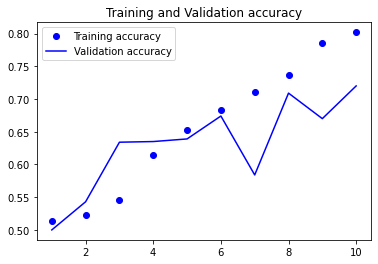

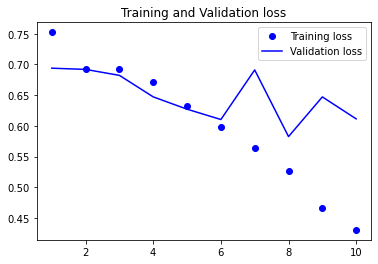

In [61]:
### 훈련 과정의 정확도와 손실 그래프
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy)+1)

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [64]:
### 테스트 세트에서 모델 평가
test_model = keras.models.load_model('convnet_from_scratch.keras')
test_loss, test_acc = test_model.evaluate(test_dataset)
np.round(test_acc, 3)

32/32 [==============================] - 4s 114ms/step - loss: 0.5748 - accuracy: 0.7154


0.715

### (5) 데이터 증식
데이터 증식은 기존 훈련샘플로부터 더 많은 훈련 데이터를 생성하는 방법이다<br>
여러가지 랜덤한 변환을 적용하여 샘플을 늘린다<br>
훈련할 때 모델이 정확히 같은 데이터를 2번 만나지 않도록 하는 것이 목표이며<br>
모델이 데이터의 여러 측면을 학습하므로 더 잘 일반화할 수 있다

In [65]:
### 컨브넷에 추가할 데이터 증식 단계 정의
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),   #랜덤하게 50% 이미지를 수평으로 뒤집는다
    layers.RandomRotation(0.1),        #[-10%, +10%] 범위 안에서 랜덤한 값만큼 이미지 회전
    layers.RandomZoom(0.2)             #[-20%, +20%] 범위 안에서 랜덤한 비율만큼 이미지 확대 또는 축소
])

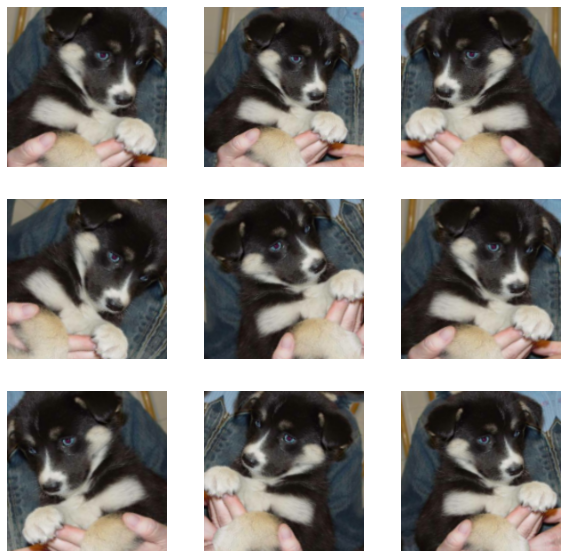

In [66]:
### 랜덤하게 증식된 훈련 이미지 확인
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):    #take(N) : 데이터셋에서 N개의 배치만 샘플링(= N번째 배치 후에 루프 중단)
    for i in range(9):
        augmented_images = data_augmentation(images)   #배치 이미지에 데이터 증식 적용
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(augmented_images[0].numpy().astype('uint8'))
        plt.axis('off')

'데이터 증식' 을 사용하여 새로운 모델을 훈련시킬 때는 단지 '기존 정보의 재조합' 만 가능하다<br>
따라서 과대적합을 더 억제하기 위해 밀집 연결 분류기 직전에 'Dropout 층' 을 추가한다<br>
랜덤한 이미지 증식 층은 Dropout 층처럼 '추론할 때' 는 동작하지 않는다 (predict() 나 evaluate() 메서드를 호출할 때)<br>
즉 모델을 평가할 때는 데이터 증식과 드롭아웃이 없는 모델처럼 동작한다

In [67]:
### 이미지 증식과 드롭아웃을 포함한 컨브넷
inputs = keras.Input(shape=(180,180,3))   #180x180 크기의 RGB 이미지

x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)   #입력을 255로 나누어 0~1 범위로 스케일 조정
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(units=1, activation='sigmoid')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss = 'binary_crossentropy',
             optimizer='rmsprop',
             metrics='accuracy')

In [ ]:
### 규제를 추가한 컨브넷 훈련하기
callbacks = [
    keras.callbacks.ModelCheckpoint(             # ModelCheckpoint : 에포크가 끝날 때마다 모델 저장
        filepath='convnet_from_scratch_with_augmentation.keras',   # 파일 저장 경로
        save_best_only=True,                     # val_loss 값이 이전보다 더 낮을 때만 저장
        monitor='val_loss')
]

history = model.fit(
    train_dataset,
    epochs=50,
    validation_data = validation_dataset,
    callbacks=callbacks)

In [ ]:
### 훈련 과정의 정확도와 손실 그래프
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy)+1)

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [ ]:
### 테스트 세트의 정확도 확인
test_model = keras.models.load_model(
    'convnet_from_scratch_with_augmentation.keras')
test_loss, test_acc = test_model.evaluate(test_dataset)
np.round(test_acc, 3)